## Problem Statement

### Business Context:

AlphaCom, a leading telecommunications provider, has recently experienced a concerning rise in customer churn despite offering competitive services and a wide product portfolio. This increase is directly impacting revenue and undermining brand reputation in an intensely competitive market. Traditional retention strategies have proven inadequate because customer churn is influenced by a complex mix of factors, including service usage, billing preferences, contract types, and demographics. Without clear insights into these patterns, the company is left reacting to churn instead of preventing it.

### Objective

As a data scientist at AlphaCom, you are tasked with developing a predictive model to identify customers at high risk of churn and uncover the key factors driving their decisions. Solving this problem will enable the company to proactively design targeted retention strategies, reduce churn-related losses, and improve customer lifetime value, ultimately safeguarding revenue and strengthening AlphaCom’s competitive position. 


### Data Description

The data contains different attributes related to churn. The detailed data dictionary is given below:

* Gender: The customer’s gender (e.g., Male or Female). This demographic feature may correlate with customer behavior.
* SeniorCitizen: A binary indicator (if included) that identifies whether the customer is a senior citizen (commonly 1 for senior, 0 for non-senior). Senior status can influence service preferences and retention strategies.
* Partner: Indicates whether the customer has a partner. This factor can affect customer loyalty and service usage patterns.
* Dependents: Specifies whether the customer has dependents. This information can provide context on the customer’s household and influence their service needs.
* Tenure: The number of months the customer has been with the company. Longer tenure may indicate higher loyalty, while shorter tenure could be a churn risk indicator.
* PhoneService: Denotes whether the customer subscribes to telephone services. This binary feature (Yes/No) helps understand service adoption.
* MultipleLines: Indicates if the customer has multiple phone lines. This feature can provide insight into customer behavior and service complexity.
* InternetService: Describes the type of internet service the customer uses (e.g., DSL, Fiber optic, or None). The type of internet service can be a critical factor in churn analysis.
* OnlineSecurity: Shows whether the customer subscribes to online security services. This value (Yes/No) may influence customer satisfaction and retention.
* OnlineBackup: Indicates if the customer has an online backup service. Similar to online security, this can be a part of the overall service bundle affecting churn.
* DeviceProtection: Specifies whether the customer is enrolled in a device protection plan, providing an added layer of service value.
* TechSupport: Denotes if the customer subscribes to technical support services. Access to tech support can improve customer experience and reduce churn.
* StreamingTV: Indicates whether the customer subscribes to a streaming TV service. Media consumption patterns can be a differentiator in customer preferences.
* StreamingMovies: Specifies if the customer subscribes to a streaming movies service. This, combined with other services, can highlight trends in customer behavior.
* Contract: Describes the type of contract the customer holds (e.g., month-to-month, one-year, or two-year). Contract type is a strong indicator of churn risk—shorter contracts are often associated with higher churn.
* PaperlessBilling: Indicates whether the customer is enrolled in paperless billing. This operational feature can sometimes correlate with customer engagement levels.
* PaymentMethod: Details the payment method used by the customer (e.g., electronic check, mailed check, bank transfer, or credit card). Payment methods can affect both churn and overall customer satisfaction.
* MonthlyCharges: The monthly amount in USD charged to the customer. Higher charges might increase the likelihood of churn if customers perceive the cost as too high for the value provided.
* TotalCharges: The cumulative amount in USD charged over the customer’s tenure. This helps in understanding the long-term value of each customer and can be a predictor of churn.
* Churn: The target variable indicating whether the customer has left (typically denoted as “Yes” or “No”). This is the primary outcome you aim to predict with your machine learning model.

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import math
import re
from scipy.stats import loguniform

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
import statsmodels.api as statmod
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    StackingClassifier
)
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# To supress warnings
import warnings
warnings.filterwarnings("ignore")
print('Lib. Import Done')

Lib. Import Done


## Loading the dataset

In [2]:
import os
path = os.getcwd() + '\\customer_churn.csv'
data = pd.read_csv(path)

In [3]:
# copying data to another variable to avoid any changes to original data
df_data = data.copy()

## Data Overview

### Checking the shape of the dataset

In [4]:
# Checking the number of rows and columns in the training data
df_data.shape

(12055, 20)

### Displaying the first few rows of the dataset

In [5]:
# let's view the first 5 rows of the data
df_data.head().T

0             1               2  \
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
tenure                       1.000        34.000           2.000   
PhoneService                    No           Yes             Yes   
MultipleLines     No phone service            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No              No   
StreamingMovies                 No            No              No   
Contract            Month-to-month      One year  Month-to-month   
PaperlessBilling               Yes            No             Yes   
PaymentMethod     Electronic check  Mailed Check    Mailed check   
MonthlyCharges              $29.85        $56.95          $53.85   
TotalCharges                $29.85       $1889.5         $108.15   
Churn                         No              NO             YES   

                                          3                 4  
gender                                 Male            Female  
SeniorCitizen                             0                 0  
Partner                                  No                No  
Dependents                               No                No  
tenure                               45.000             2.000  
PhoneService                             No               Yes  
MultipleLines              No phone service                No  
InternetService                         DSL       Fiber optic  
OnlineSecurity                          Yes                No  
OnlineBackup                             No                No  
DeviceProtection                        Yes                No  
TechSupport                             Yes                No  
StreamingTV                              No                No  
StreamingMovies                          No                No  
Contract                           One year    Month-to-month  
PaperlessBilling                         No               Yes  
PaymentMethod     bank transfer (automatic)  ELECTRONIC CHECK  
MonthlyCharges                        $42.3             $70.7  
TotalCharges                       $1840.75              $nan  
Churn                                  No                 yes

### Checking the data types of the columns for the dataset & fixing anomalies

In [6]:
# let's check the data types of the columns in the dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            12055 non-null  object 
 1   SeniorCitizen     12055 non-null  int64  
 2   Partner           12055 non-null  object 
 3   Dependents        12055 non-null  object 
 4   tenure            11451 non-null  float64
 5   PhoneService      12055 non-null  object 
 6   MultipleLines     12055 non-null  object 
 7   InternetService   12055 non-null  object 
 8   OnlineSecurity    12055 non-null  object 
 9   OnlineBackup      12055 non-null  object 
 10  DeviceProtection  12055 non-null  object 
 11  TechSupport       12055 non-null  object 
 12  StreamingTV       12055 non-null  object 
 13  StreamingMovies   12055 non-null  object 
 14  Contract          12055 non-null  object 
 15  PaperlessBilling  12055 non-null  object 
 16  PaymentMethod     12055 non-null  object

In [7]:
# Monthly & Total Charges should be numeric. Lets clean up by removing currencies & then convert to numeric
df_data[["MonthlyCharges", "TotalCharges"]] = (
    df_data[["MonthlyCharges", "TotalCharges"]]
    .replace({'\$|£|Â£': ''}, regex=True)
    .apply(pd.to_numeric, errors='coerce')
)

# For consistency, lets convert SeniorCitizen to Yes/No (object datatype) from 1/0 (int datatype)
df_data["SeniorCitizen"] = df_data["SeniorCitizen"].map({1: "Yes", 0: "No"}).astype("object")

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            12055 non-null  object 
 1   SeniorCitizen     12055 non-null  object 
 2   Partner           12055 non-null  object 
 3   Dependents        12055 non-null  object 
 4   tenure            11451 non-null  float64
 5   PhoneService      12055 non-null  object 
 6   MultipleLines     12055 non-null  object 
 7   InternetService   12055 non-null  object 
 8   OnlineSecurity    12055 non-null  object 
 9   OnlineBackup      12055 non-null  object 
 10  DeviceProtection  12055 non-null  object 
 11  TechSupport       12055 non-null  object 
 12  StreamingTV       12055 non-null  object 
 13  StreamingMovies   12055 non-null  object 
 14  Contract          12055 non-null  object 
 15  PaperlessBilling  12055 non-null  object 
 16  PaymentMethod     12055 non-null  object

In [8]:
# Check Value_counts of all object columns
object_cols = df_data.select_dtypes(include='object').columns.tolist()

# Show value counts for each categorical column
for col in object_cols:
    print(f"\n=== Value counts for '{col}' ===")
    counts = df_data[col].value_counts(dropna=False)
    percentages = (counts / len(df_data) * 100).round(2)
    result = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    print(result)


=== Value counts for 'gender' ===
        Count  Percentage
gender                   
Male     6710      55.660
Female   5345      44.340

=== Value counts for 'SeniorCitizen' ===
               Count  Percentage
SeniorCitizen                   
No             10633      88.200
Yes             1422      11.800

=== Value counts for 'Partner' ===
         Count  Percentage
Partner                   
No        6989      57.980
Yes       5066      42.020

=== Value counts for 'Dependents' ===
            Count  Percentage
Dependents                   
No           8846      73.380
Yes          3209      26.620

=== Value counts for 'PhoneService' ===
              Count  Percentage
PhoneService                   
Yes           10747      89.150
No             1308      10.850

=== Value counts for 'MultipleLines' ===
                  Count  Percentage
MultipleLines                      
Yes                5609      46.530
No                 5157      42.780
No phone service   1289      

In [9]:
# Fixing Data in 'Multple lines'
# Replace Yes --> Mutiple Phone Lines; No --> Single Phone Line; No phone service remains as is
df_data["MultipleLines"] = df_data["MultipleLines"].replace({
        "Yes": "Multiple phone lines",
        "No": "Single phone line" })

df_data["MultipleLines"].value_counts(dropna=False)

MultipleLines
Multiple phone lines    5609
Single phone line       5157
No phone service        1289
Name: count, dtype: int64

In [10]:
# Analyze Phone Service & Multiple Lines together for any inconsistency
pd.crosstab(df_data["PhoneService"], df_data["MultipleLines"])

MultipleLines  Multiple phone lines  No phone service  Single phone line
PhoneService                                                            
No                               68              1137                103
Yes                            5541               152               5054

In [11]:
# Fixing Inconsistency in MultipleLines
df_data.loc[df_data["PhoneService"] == "No", "MultipleLines"] = "No phone service"
df_data.loc[
    (df_data["PhoneService"] == "Yes") & (df_data["MultipleLines"] == "No phone service"),
    "MultipleLines"
] = "Single phone line"
pd.crosstab(df_data["PhoneService"], df_data["MultipleLines"])

MultipleLines  Multiple phone lines  No phone service  Single phone line
PhoneService                                                            
No                                0              1308                  0
Yes                            5541                 0               5206

In [12]:
# Merge PhoneService & MultipleLines into one combined column
df_data["PhoneServiceStatus"] = np.where(df_data["PhoneService"] == "No", "No phone service", df_data["MultipleLines"])
df_data.drop(columns=["PhoneService", "MultipleLines"], inplace=True)
df_data["PhoneServiceStatus"].value_counts(dropna=False)

PhoneServiceStatus
Multiple phone lines    5541
Single phone line       5206
No phone service        1308
Name: count, dtype: int64

In [13]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              12055 non-null  object 
 1   SeniorCitizen       12055 non-null  object 
 2   Partner             12055 non-null  object 
 3   Dependents          12055 non-null  object 
 4   tenure              11451 non-null  float64
 5   InternetService     12055 non-null  object 
 6   OnlineSecurity      12055 non-null  object 
 7   OnlineBackup        12055 non-null  object 
 8   DeviceProtection    12055 non-null  object 
 9   TechSupport         12055 non-null  object 
 10  StreamingTV         12055 non-null  object 
 11  StreamingMovies     12055 non-null  object 
 12  Contract            12055 non-null  object 
 13  PaperlessBilling    12055 non-null  object 
 14  PaymentMethod       12055 non-null  object 
 15  MonthlyCharges      11754 non-null  float64
 16  Tota

In [14]:
#lets do similar data inconsistency checks on internet services
internet_services = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

for col in internet_services:
    print(f"\n=== Crosstab: InternetService vs {col} ===")
    print(pd.crosstab(df_data["InternetService"], df_data[col]))


=== Crosstab: InternetService vs OnlineSecurity ===
OnlineSecurity     No  No internet service   Yes
InternetService                                 
DSL              2555                   19  1776
Fiber optic      3741                    7  1130
No                 16                 2793    18

=== Crosstab: InternetService vs OnlineBackup ===
OnlineBackup       No  No internet service   Yes
InternetService                                 
DSL              2852                   12  1486
Fiber optic      3089                    7  1782
No                 41                 2783     3

=== Crosstab: InternetService vs DeviceProtection ===
DeviceProtection    No  No internet service   Yes
InternetService                                  
DSL               1936                   24  2390
Fiber optic       2643                    9  2226
No                  13                 2796    18

=== Crosstab: InternetService vs TechSupport ===
TechSupport        No  No internet service   Yes
In

In [15]:
# Fixing Inconsistency in Internet Services Cols
for c in internet_services:
    df_data[c] = np.where(df_data["InternetService"] == "No","No internet service",np.where(df_data[c] == "No internet service","No",df_data[c]))

for col in internet_services:
    print(f"\n=== Crosstab: InternetService vs {col} ===")
    print(pd.crosstab(df_data["InternetService"], df_data[col]))


=== Crosstab: InternetService vs OnlineSecurity ===
OnlineSecurity     No  No internet service   Yes
InternetService                                 
DSL              2574                    0  1776
Fiber optic      3748                    0  1130
No                  0                 2827     0

=== Crosstab: InternetService vs OnlineBackup ===
OnlineBackup       No  No internet service   Yes
InternetService                                 
DSL              2864                    0  1486
Fiber optic      3096                    0  1782
No                  0                 2827     0

=== Crosstab: InternetService vs DeviceProtection ===
DeviceProtection    No  No internet service   Yes
InternetService                                  
DSL               1960                    0  2390
Fiber optic       2652                    0  2226
No                   0                 2827     0

=== Crosstab: InternetService vs TechSupport ===
TechSupport        No  No internet service   Yes
In

In [16]:
#Lets create another columns - Internet_AddOnCount
df_data["Internet_AddOnCount"] = (df_data[internet_services] == "Yes").sum(axis=1)

In [17]:
# Fix PaymentMethod & Churn columns with standard values

# Clean 'PaymentMethod' values
df_data["PaymentMethod"] = (
    df_data["PaymentMethod"]
    .astype(str)             # ensure string type
    .str.strip()             # remove leading/trailing spaces
    .str.lower()             # convert to lowercase
    .str.replace(r'\s+', ' ', regex=True)  # normalize multiple spaces
)
payment_map = {
    "electronic check": "Electronic check",
    "credit card (automatic)": "Credit card (automatic)",
    "mailed check": "Mailed check",
    "bank transfer (automatic)": "Bank transfer (automatic)"
}

df_data["PaymentMethod"] = df_data["PaymentMethod"].map(payment_map)
df_data["PaymentMethod"].value_counts(dropna=False)

PaymentMethod
Electronic check             4145
Credit card (automatic)      2930
Mailed check                 2585
Bank transfer (automatic)    2395
Name: count, dtype: int64

In [18]:
# Clean up the 'Churn' column
df_data["Churn"] = (
    df_data["Churn"]
    .astype(str)                # ensure text
    .str.strip()                # remove leading/trailing spaces
    .str.lower()                # standardize case
    .replace({'yes': 'Yes', 'no': 'No'})  # map to consistent labels
)
df_data["Churn"].value_counts(dropna=False)

Churn
No     8650
Yes    3405
Name: count, dtype: int64

In [19]:
#check for negative values & replace with NAN which are logocally inconsistent in our use case
cols = ["tenure", "MonthlyCharges", "TotalCharges"]
neg_counts = (df_data[cols] < 0).sum()
print('Negative Value Check:-')
print(neg_counts)
#replace negative values with NAN
df_data[cols] = df_data[cols].mask(df_data[cols] < 0, np.nan)

neg_counts_post = (df_data[cols] < 0).sum()
print('Negative Value Check Post Treatment:-')
print(neg_counts_post)

Negative Value Check:-
tenure            127
MonthlyCharges      0
TotalCharges      147
dtype: int64
Negative Value Check Post Treatment:-
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64


In [20]:
#Create a new columns IsNewCustomer for all customers with tenure = 0
df_data["IsNewCustomer"] = np.where(df_data["tenure"] == 0, "Yes", "No")
df_data["IsNewCustomer"].value_counts()

IsNewCustomer
No     11755
Yes      300
Name: count, dtype: int64

### Checking for duplicate values

In [21]:
# let's check for duplicate values in the data
print('Duplicated Values: ',df_data.duplicated().sum())

Duplicated Values:  27


In [22]:
#Drop duplicate rows
df_data = df_data.drop_duplicates()
df_data = df_data.reset_index(drop=True)
print('Duplicated Values Post-dropping duplicates: ',df_data.duplicated().sum())

Duplicated Values Post-dropping duplicates:  0


### Checking for missing values

In [23]:
# let's check for missing values in the data
print('Missing Values:-\n')
df_data.isnull().sum()

Missing Values:-



gender                    0
SeniorCitizen             0
Partner                   0
Dependents                0
tenure                  728
InternetService           0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
StreamingTV               0
StreamingMovies           0
Contract                  0
PaperlessBilling          0
PaymentMethod             0
MonthlyCharges          301
TotalCharges           1351
Churn                     0
PhoneServiceStatus        0
Internet_AddOnCount       0
IsNewCustomer             0
dtype: int64

In [24]:
# Impute Missing Values using KNN Imputer (please note we will have to use RobustScaler first before using KNNImputer)
#Define columns
num_cols_knn = ["tenure", "MonthlyCharges", "TotalCharges"]  # columns to impute
cat_cols_knn = ["Contract", "InternetService", "PaymentMethod", "SeniorCitizen", "Dependents"]  # context columns

#One-hot encode categorical columns
df_knn_encoded = pd.get_dummies(df_data[cat_cols_knn], drop_first=False)

#Scale numeric columns using RobustScaler
scaler = RobustScaler()
df_knn_scaled = df_data.copy()
df_knn_scaled[num_cols_knn] = scaler.fit_transform(df_knn_scaled[num_cols_knn])

#Combine numeric + encoded categorical columns
X_knn = pd.concat([df_knn_scaled[num_cols_knn], df_knn_encoded], axis=1)

#Initialize and apply KNN imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform')
X_imputed = imputer.fit_transform(X_knn)

#Convert imputed data back to DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X_knn.columns, index=df_data.index)

#Reverse scaling to restore original values
X_imputed[num_cols_knn] = scaler.inverse_transform(X_imputed[num_cols_knn])

#Replace missing values in original DataFrame with imputed ones (rounded)
for col in num_cols_knn:
    df_data[col] = np.round(X_imputed[col], 2)

#Verify
print(df_data.isna().sum())

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
PhoneServiceStatus     0
Internet_AddOnCount    0
IsNewCustomer          0
dtype: int64


In [25]:
# Monthly Charges & Total Charges, together would lead to multicollinearity.
# Create 3 additional features to derive info from Total charges & then drop it

df_data["AvgMonthlySpend"] = (df_data["TotalCharges"] / df_data["tenure"].replace(0, np.nan))
df_data["BillingRatio"] = (df_data["TotalCharges"] / (df_data["MonthlyCharges"] * df_data["tenure"].replace(0, np.nan)))
df_data["RelativeSpend"] = (df_data["MonthlyCharges"] / df_data["AvgMonthlySpend"].replace(0, np.nan))

# Drop TotalCharges
df_data.drop(columns=["TotalCharges"], inplace=True)

# These ratios will generate NAN since we have tenure values as zero in denomenator. Let check:-
print(df_data.isna().sum())

gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
tenure                   0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaperlessBilling         0
PaymentMethod            0
MonthlyCharges           0
Churn                    0
PhoneServiceStatus       0
Internet_AddOnCount      0
IsNewCustomer            0
AvgMonthlySpend        300
BillingRatio           300
RelativeSpend          302
dtype: int64


In [26]:
# These are new customers with tenure = 0 (or Total Charges = 0). Lets replace them with 0. 
# Mathematically, a new customer has no billing or spend yet.
# For logistic regression, we need numeric values (no NaN).
# New customers will have values = 0 for these ratios while Older customers retain their real derived values.
# The IsNewCustomer flag allows the model to learn that “0” = new user.

cols_ratios = ["AvgMonthlySpend", "BillingRatio", "RelativeSpend"]
df_data[cols_ratios] = df_data[cols_ratios].fillna(0)

print(df_data.isna().sum())

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
Churn                  0
PhoneServiceStatus     0
Internet_AddOnCount    0
IsNewCustomer          0
AvgMonthlySpend        0
BillingRatio           0
RelativeSpend          0
dtype: int64


In [27]:
# tenure is one of the strongest churn predictors — but its effect is non-linear. Binning helps capture those non-linear lifecycle effects explicitly
df_data["TenureGroup"] = pd.cut(
    df_data["tenure"],
    bins=[-1, 6, 12, 24, 48, 80],
    labels=["0–6m", "7–12m", "13–24m", "25–48m", "49m+"]
)

# Drop tenure
df_data.drop(columns=["tenure"], inplace=True)

In [28]:
# ContractPaymentCombo captures interaction between billing preference and commitment length
df_data["ContractPaymentCombo"] = df_data["Contract"] + "_" + df_data["PaymentMethod"]

In [29]:
# Add another feature Cost Deviation - Price sensitivity by service type
# Customers paying more than average for their (contract + service type) combo may churn from perceived unfair pricing.

df_data["ServiceAvgCharge"] = df_data.groupby(["Contract", "InternetService"])["MonthlyCharges"].transform("mean")
df_data["CostDeviation"] = df_data["MonthlyCharges"] - df_data["ServiceAvgCharge"]
df_data.drop(columns=["ServiceAvgCharge"], inplace=True)

In [30]:
#Checking datatypes again
# Convert all object columns to category dtype
df_data = df_data.astype({col: "category" for col in df_data.select_dtypes(include="object").columns})
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12028 entries, 0 to 12027
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   gender                12028 non-null  category
 1   SeniorCitizen         12028 non-null  category
 2   Partner               12028 non-null  category
 3   Dependents            12028 non-null  category
 4   InternetService       12028 non-null  category
 5   OnlineSecurity        12028 non-null  category
 6   OnlineBackup          12028 non-null  category
 7   DeviceProtection      12028 non-null  category
 8   TechSupport           12028 non-null  category
 9   StreamingTV           12028 non-null  category
 10  StreamingMovies       12028 non-null  category
 11  Contract              12028 non-null  category
 12  PaperlessBilling      12028 non-null  category
 13  PaymentMethod         12028 non-null  category
 14  MonthlyCharges        12028 non-null  float64 
 15  Ch

### Statistical summary of the dataset

In [31]:
# let's view the statistical summary of the numerical columns in the data
df_data.describe(include='all').T

count unique                              top   freq  \
gender                   12028      2                             Male   6695   
SeniorCitizen            12028      2                               No  10608   
Partner                  12028      2                               No   6970   
Dependents               12028      2                               No   8822   
InternetService          12028      3                      Fiber optic   4866   
OnlineSecurity           12028      3                               No   6309   
OnlineBackup             12028      3                               No   5948   
DeviceProtection         12028      3                              Yes   4609   
TechSupport              12028      3                               No   6221   
StreamingTV              12028      3                               No   4996   
StreamingMovies          12028      3                               No   5049   
Contract                 12028      3                   Month-to-month   6533   
PaperlessBilling         12028      2                              Yes   6144   
PaymentMethod            12028      4                 Electronic check   4136   
MonthlyCharges       12028.000    NaN                              NaN    NaN   
Churn                    12028      2                               No   8634   
PhoneServiceStatus       12028      3             Multiple phone lines   5536   
Internet_AddOnCount  12028.000    NaN                              NaN    NaN   
IsNewCustomer            12028      2                               No  11728   
AvgMonthlySpend      12028.000    NaN                              NaN    NaN   
BillingRatio         12028.000    NaN                              NaN    NaN   
RelativeSpend        12028.000    NaN                              NaN    NaN   
TenureGroup              12028      5                             49m+   3578   
ContractPaymentCombo     12028     12  Month-to-month_Electronic check   3215   
CostDeviation        12028.000    NaN                              NaN    NaN   

                        mean     std     min    25%    50%    75%      max  
gender                   NaN     NaN     NaN    NaN    NaN    NaN      NaN  
SeniorCitizen            NaN     NaN     NaN    NaN    NaN    NaN      NaN  
Partner                  NaN     NaN     NaN    NaN    NaN    NaN      NaN  
Dependents               NaN     NaN     NaN    NaN    NaN    NaN      NaN  
InternetService          NaN     NaN     NaN    NaN    NaN    NaN      NaN  
OnlineSecurity           NaN     NaN     NaN    NaN    NaN    NaN      NaN  
OnlineBackup             NaN     NaN     NaN    NaN    NaN    NaN      NaN  
DeviceProtection         NaN     NaN     NaN    NaN    NaN    NaN      NaN  
TechSupport              NaN     NaN     NaN    NaN    NaN    NaN      NaN  
StreamingTV              NaN     NaN     NaN    NaN    NaN    NaN      NaN  
StreamingMovies          NaN     NaN     NaN    NaN    NaN    NaN      NaN  
Contract                 NaN     NaN     NaN    NaN    NaN    NaN      NaN  
PaperlessBilling         NaN     NaN     NaN    NaN    NaN    NaN      NaN  
PaymentMethod            NaN     NaN     NaN    NaN    NaN    NaN      NaN  
MonthlyCharges        64.374  30.235  15.290 30.825 71.300 89.300  121.670  
Churn                    NaN     NaN     NaN    NaN    NaN    NaN      NaN  
PhoneServiceStatus       NaN     NaN     NaN    NaN    NaN    NaN      NaN  
Internet_AddOnCount    1.841   1.796   0.000  0.000  1.000  3.000    6.000  
IsNewCustomer            NaN     NaN     NaN    NaN    NaN    NaN      NaN  
AvgMonthlySpend      109.382 249.554   0.000 29.039 71.222 99.441 6183.710  
BillingRatio           1.985   4.977   0.000  0.937  1.000  1.104  131.543  
RelativeSpend          1.654  17.737   0.000  0.844  0.997  1.050 1819.333  
TenureGroup              NaN     NaN     NaN    NaN    NaN    NaN      NaN  
ContractPaymentCombo     NaN     NaN     NaN    NaN    NaN    NaN     

In [32]:
# Exporting clean version 
df_data.to_csv("cleaned_customer_churn.csv", index=False,encoding="utf-8-sig")

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [33]:
    # function to plot a boxplot and a histogram along the same scale.
    
    
    def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
        """
        Boxplot and histogram combined
    
        data: dataframe
        feature: dataframe column
        figsize: size of figure (default (12,7))
        kde: whether to the show density curve (default False)
        bins: number of bins for histogram (default None)
        """
        f2, (ax_box2, ax_hist2) = plt.subplots(
            nrows=2,  # Number of rows of the subplot grid= 2
            sharex=True,  # x-axis will be shared among all subplots
            gridspec_kw={"height_ratios": (0.25, 0.75)},
            figsize=figsize,
        )  # creating the 2 subplots
        sns.boxplot(
            data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
        )  # boxplot will be created and a triangle will indicate the mean value of the column
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        ) if bins else sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2
        )  # For histogram
        ax_hist2.axvline(
            data[feature].mean(), color="green", linestyle="--"
        )  # Add mean to the histogram
        ax_hist2.axvline(
            data[feature].median(), color="black", linestyle="-"
        )  # Add median to the histogram
        f2.suptitle(f"Histogram Boxplot: {feature}", fontsize=12, fontweight="bold")

    # Tight layout to adjust spacing
    plt.tight_layout()
    plt.show();

<Figure size 640x480 with 0 Axes>

In [34]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Spectral",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    
        plt.title(f"Labeled Barplot: {feature}", fontsize=12, fontweight="bold")
    
    plt.show()  # show the plot

In [35]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print category counts and plot a stacked bar chart with dynamic title and % y-axis.

    Parameters
    ----------
    data : DataFrame
        Input dataset
    predictor : str
        Independent variable (categorical)
    target : str
        Target variable (categorical)
    """

    # --- Crosstabs for counts and proportions ---
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    # Display counts table
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)

    # Proportions table for plotting
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # --- Plot ---
    colors = ["#1f77b4", "#d62728"]   # blue, red (classic contrast)
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5), color=colors)

    # Dynamic chart title
    plt.title(f"Stacked Barplot: {predictor} vs {target}", fontsize=12, fontweight="bold")

    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: "{:.0f}%".format(y * 100)))

    plt.ylabel("Percentage", fontsize=12)
    plt.xlabel(predictor, fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Adjust legend position and layout
    plt.legend(
        title=target,
        loc="upper left",
        bbox_to_anchor=(1, 1),
        frameon=False
    )

    plt.tight_layout()
    plt.show()

In [36]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
   
    plt.show()

### Univariate analysis

In [37]:
# Separate categorical and numerical columns
cat_cols = df_data.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print('Category Columns:',cat_cols)
print('Numerical Columns',num_cols)

Category Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'PhoneServiceStatus', 'IsNewCustomer', 'TenureGroup', 'ContractPaymentCombo']
Numerical Columns ['MonthlyCharges', 'Internet_AddOnCount', 'AvgMonthlySpend', 'BillingRatio', 'RelativeSpend', 'CostDeviation']


#### Univariate Analysis - Categorical

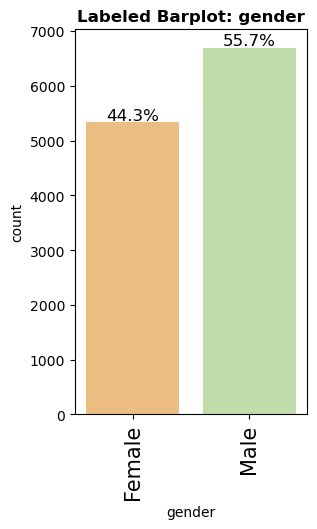

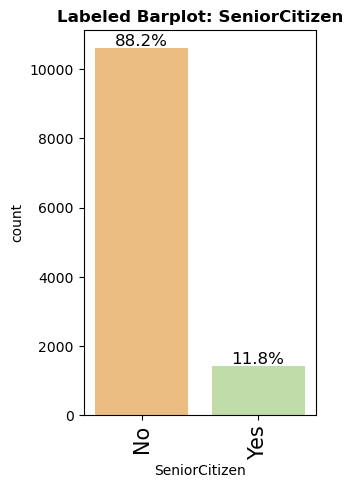

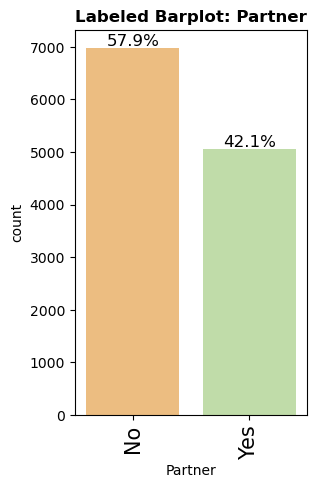

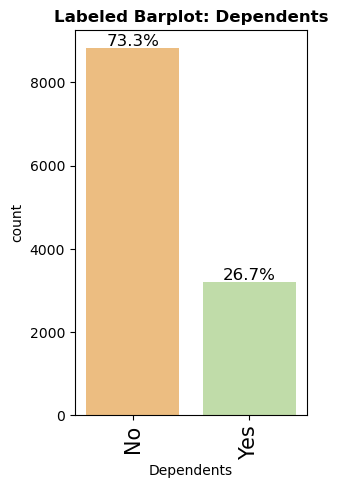

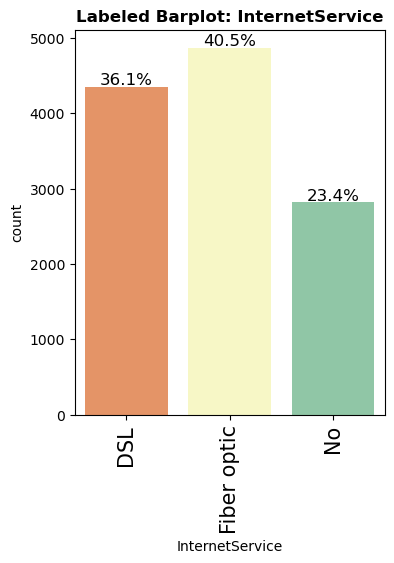

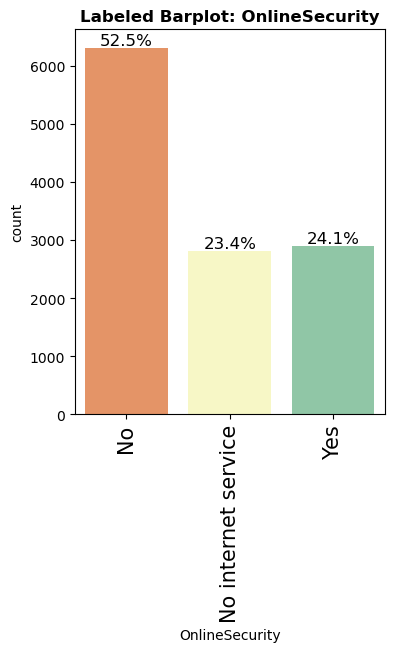

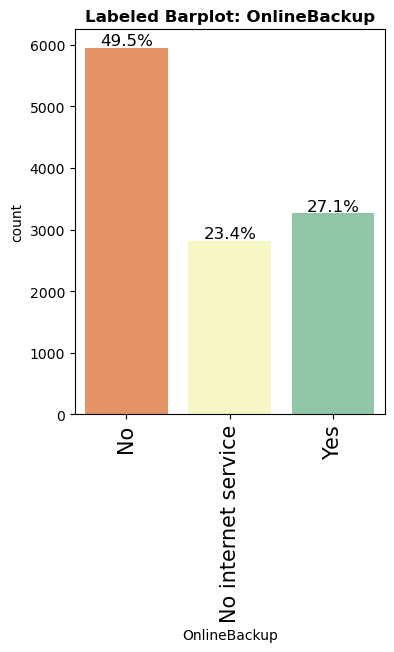

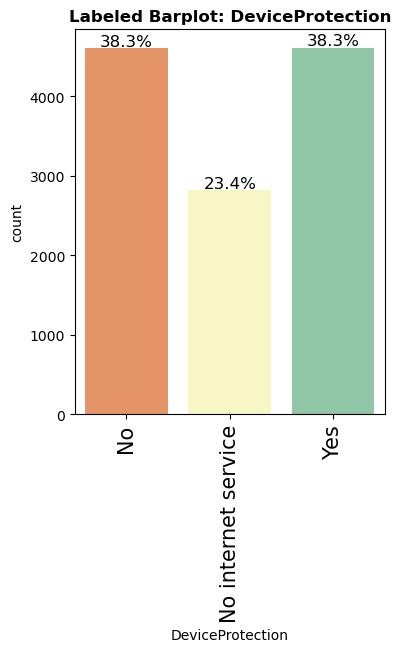

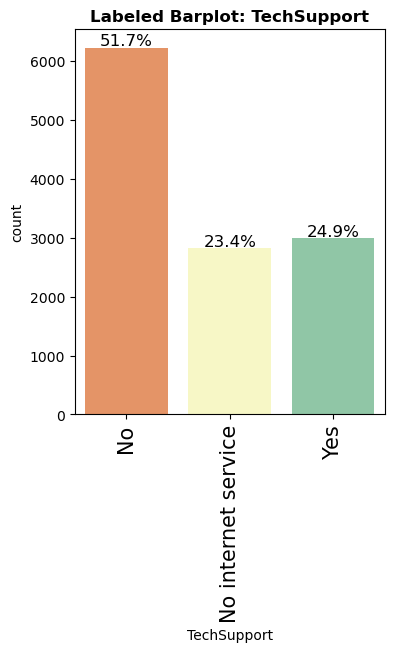

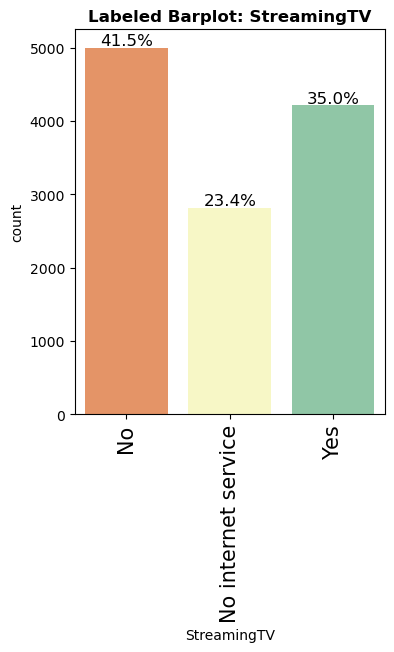

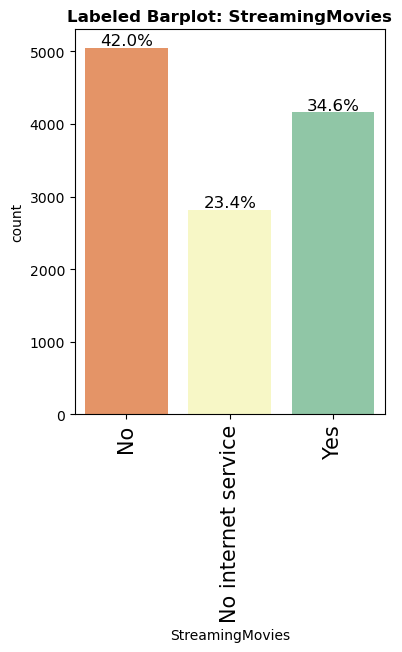

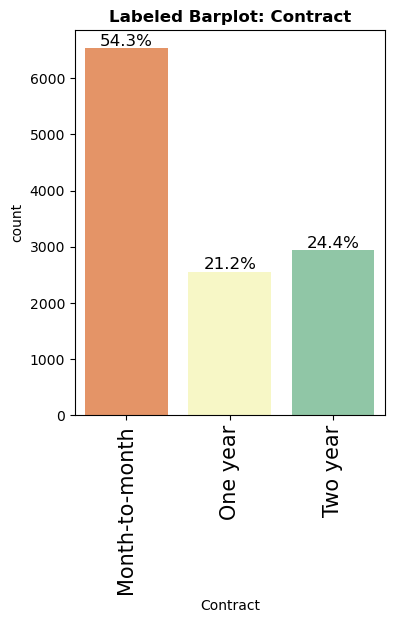

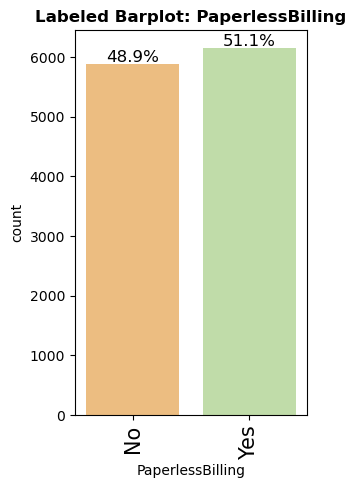

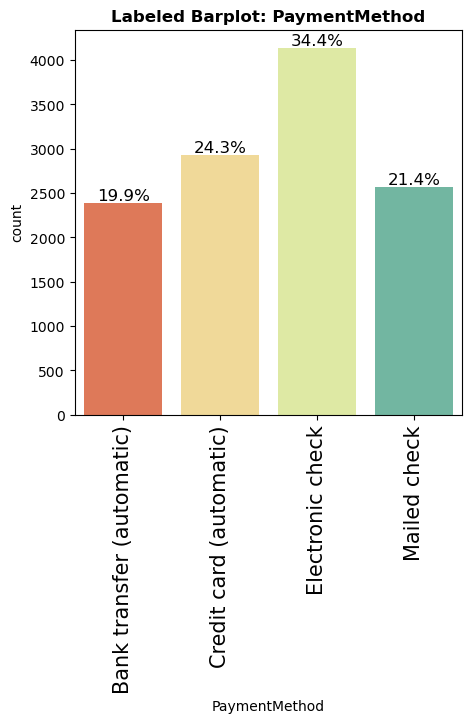

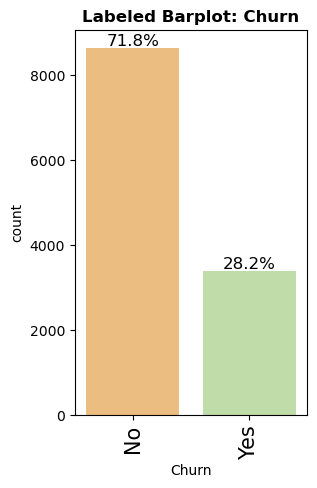

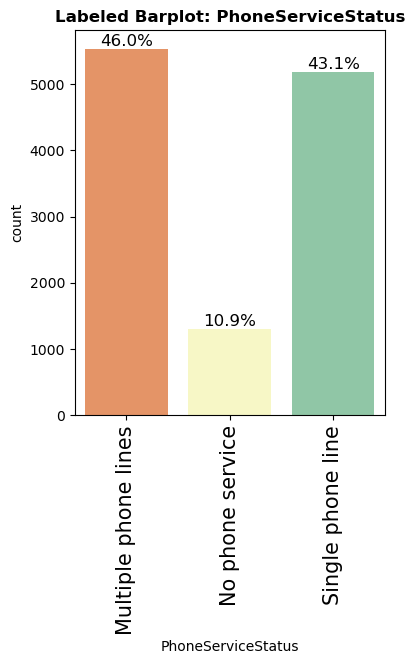

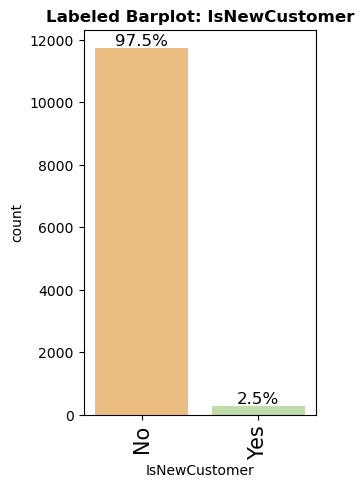

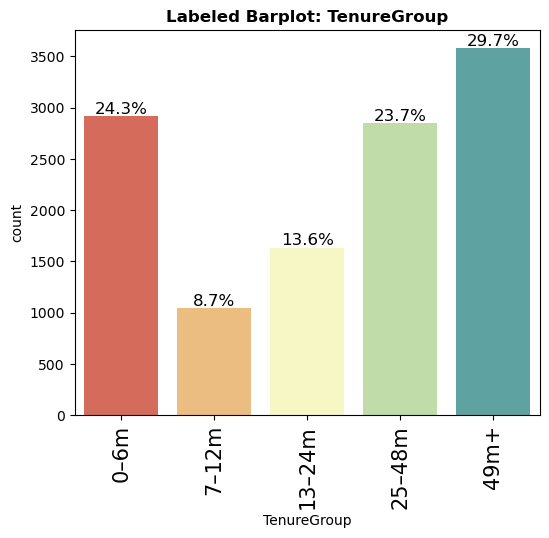

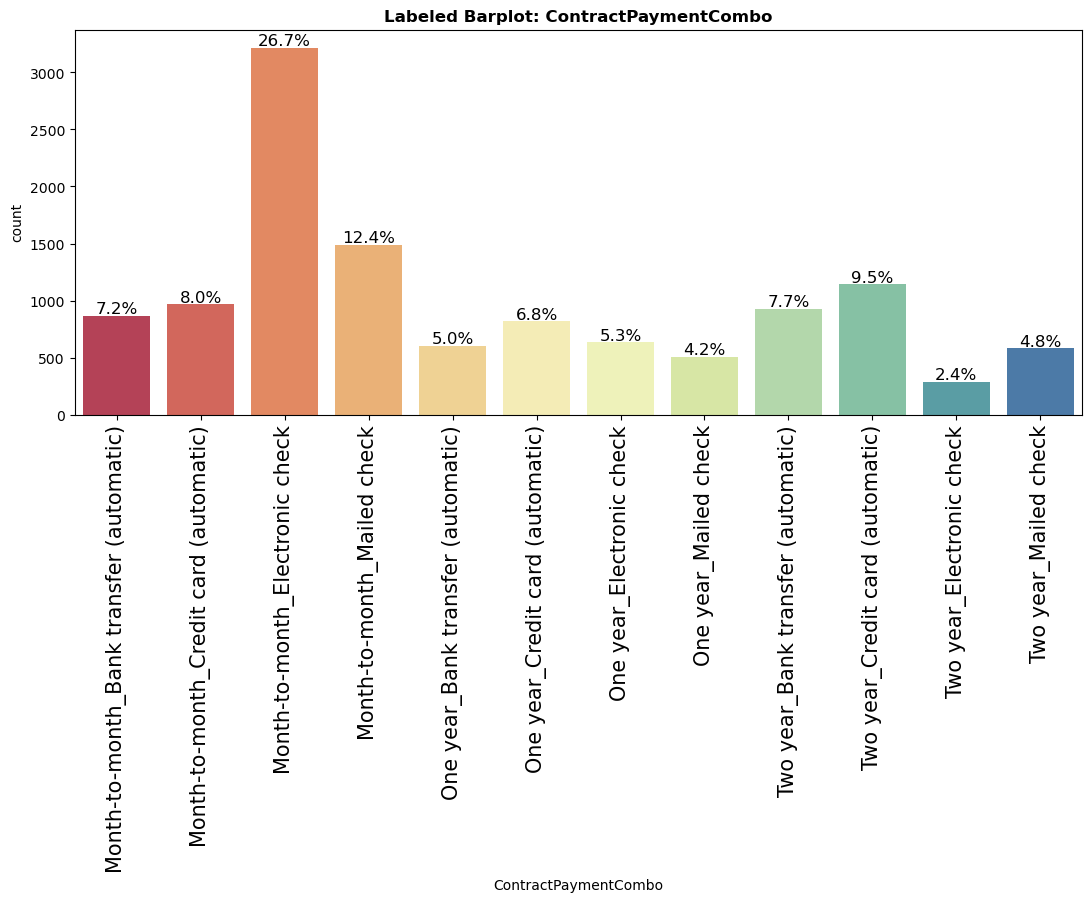

In [38]:
for i in cat_cols:
 labeled_barplot(data=df_data, feature=i, perc=True, n=None)

#### Univariate Analysis - Numerical

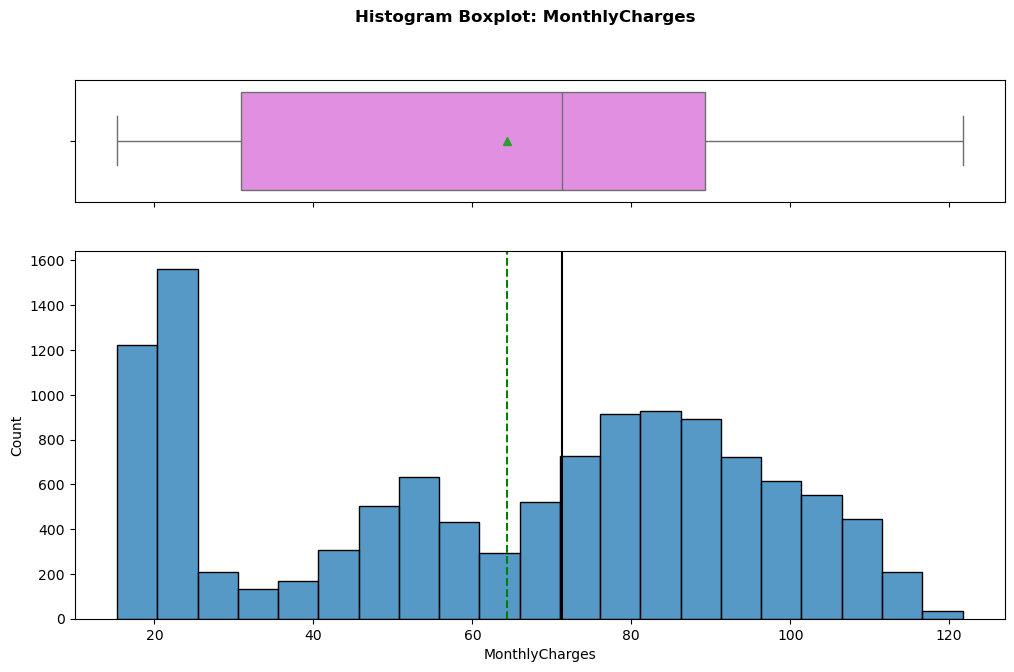

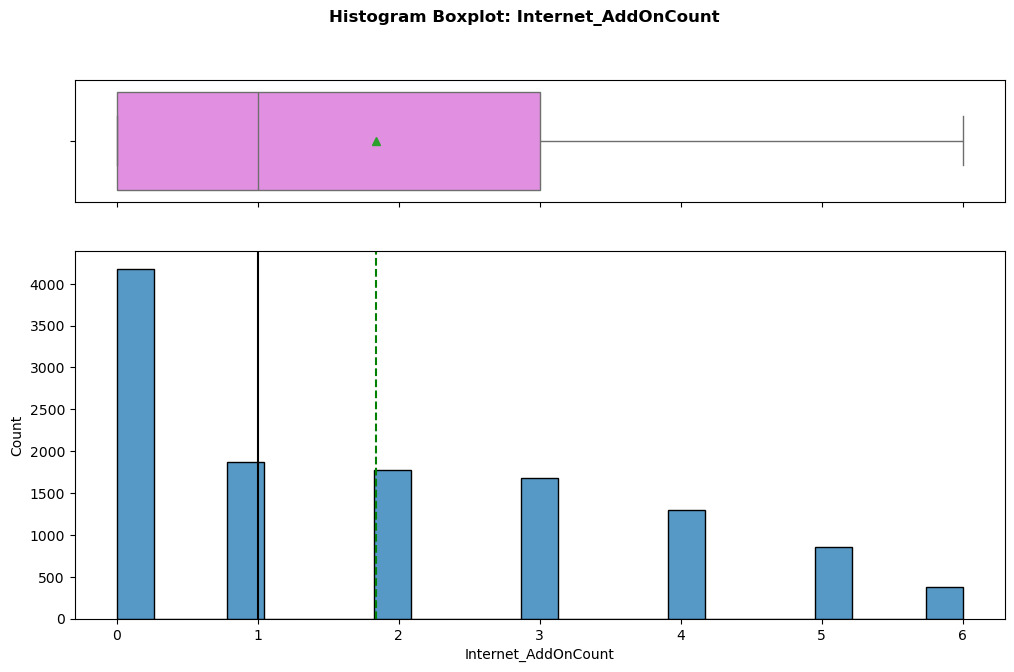

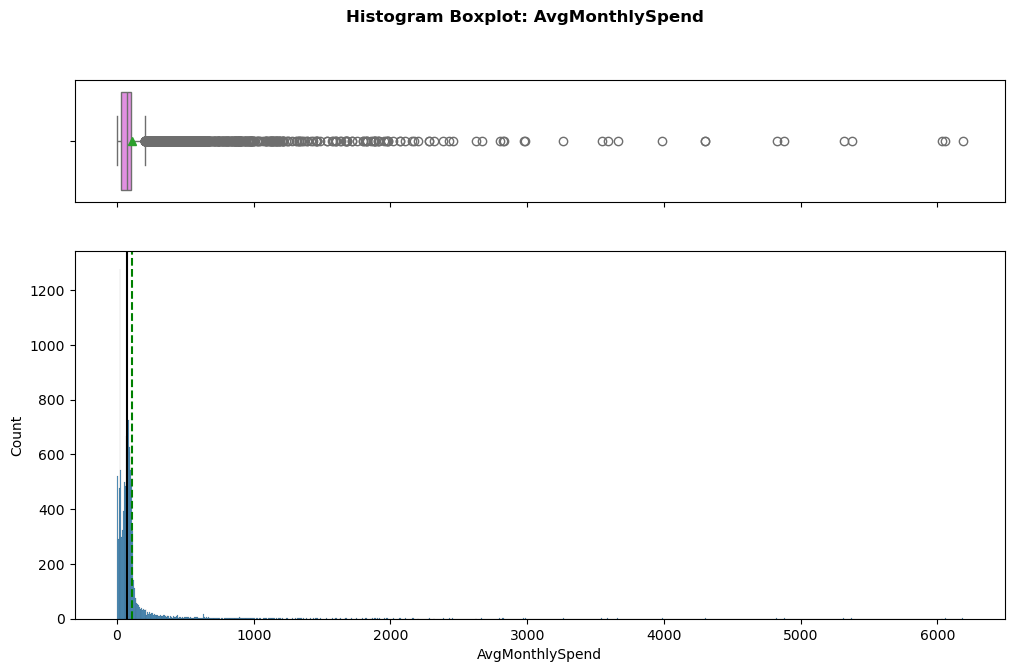

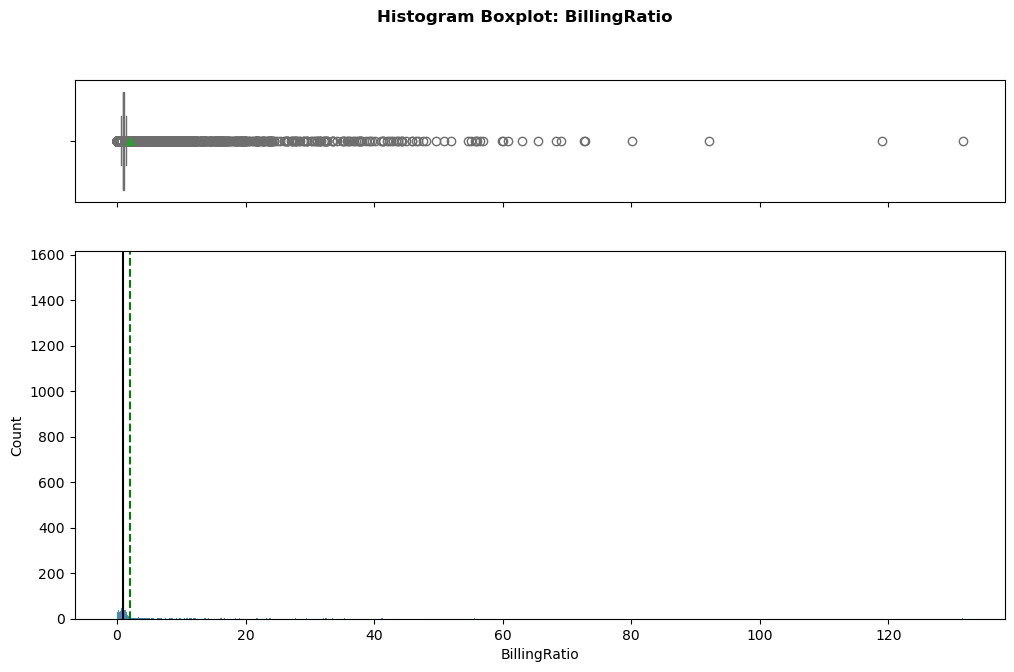

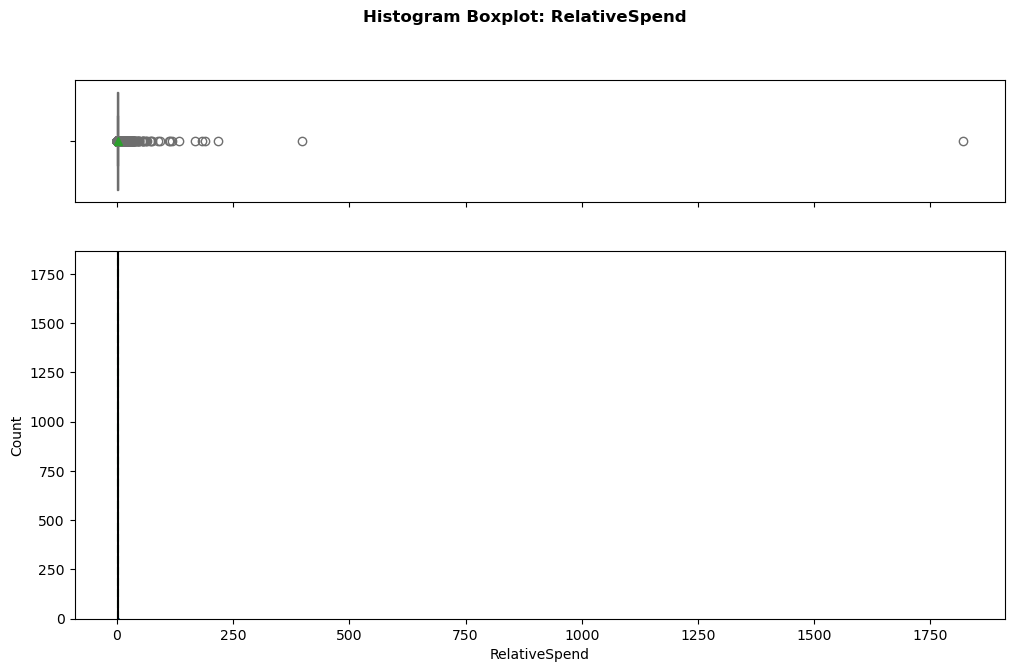

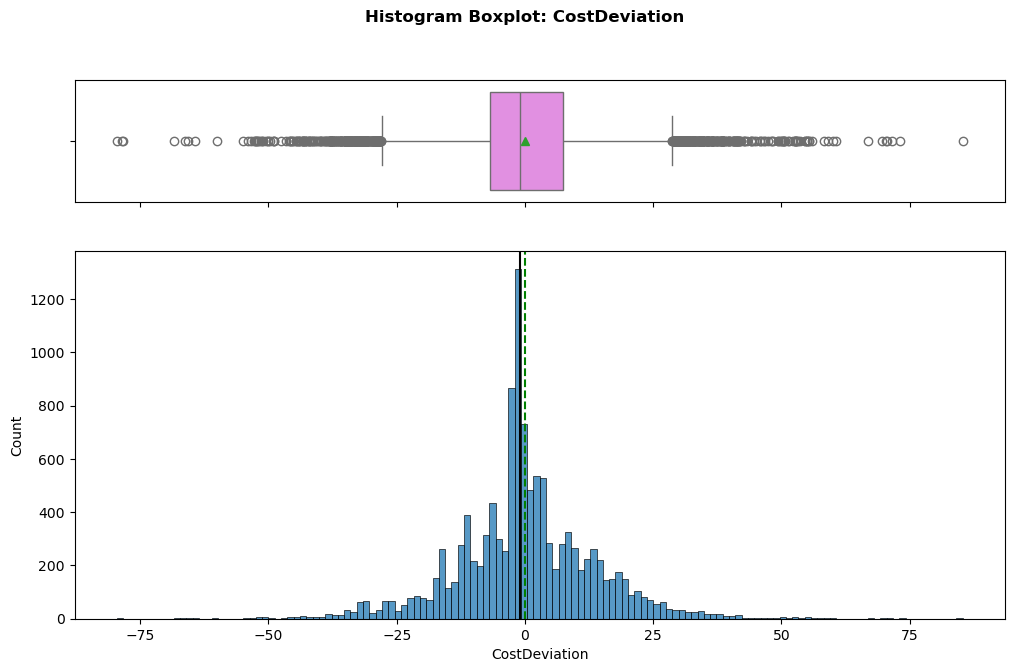

In [39]:
for i in num_cols:
    histogram_boxplot(data=df_data, feature=i, figsize=(12, 7), kde=False, bins=None)

### Bivariate Distributions

Churn     No   Yes    All
gender                   
All     8634  3394  12028
Male    4802  1893   6695
Female  3832  1501   5333
------------------------------------------------------------------------------------------------------------------------


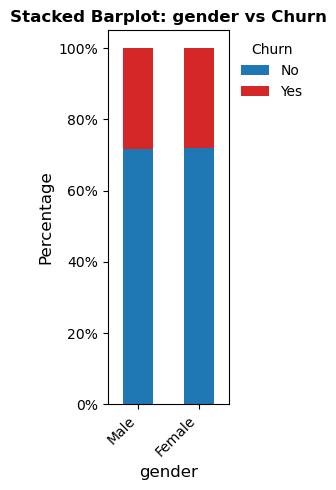

************************************************************************************************************************
Churn            No   Yes    All
SeniorCitizen                   
All            8634  3394  12028
No             7816  2792  10608
Yes             818   602   1420
------------------------------------------------------------------------------------------------------------------------


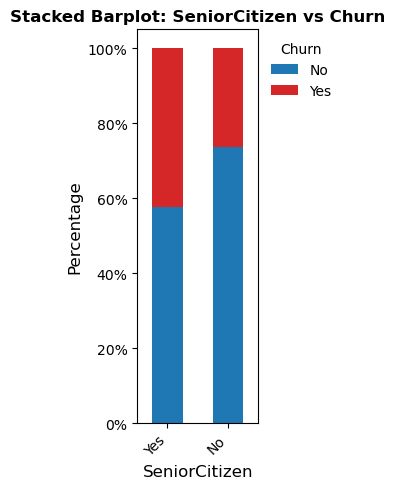

************************************************************************************************************************
Churn      No   Yes    All
Partner                   
All      8634  3394  12028
No       4634  2336   6970
Yes      4000  1058   5058
------------------------------------------------------------------------------------------------------------------------


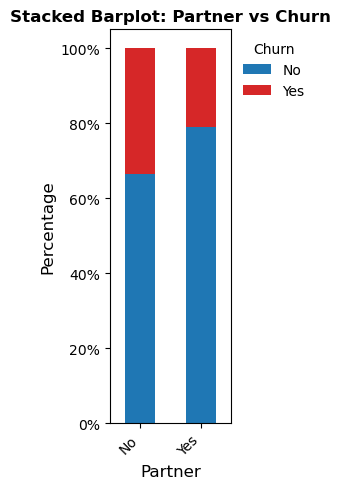

************************************************************************************************************************
Churn         No   Yes    All
Dependents                   
All         8634  3394  12028
No          5944  2878   8822
Yes         2690   516   3206
------------------------------------------------------------------------------------------------------------------------


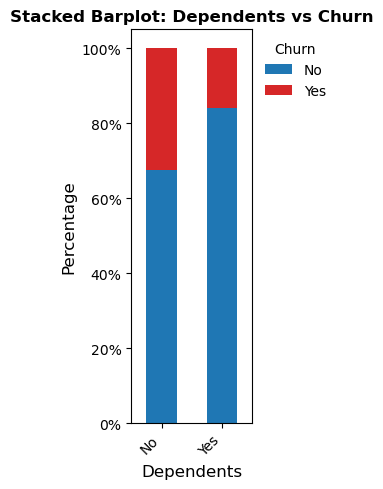

************************************************************************************************************************
Churn              No   Yes    All
InternetService                   
All              8634  3394  12028
Fiber optic      2682  2184   4866
DSL              3400   945   4345
No               2552   265   2817
------------------------------------------------------------------------------------------------------------------------


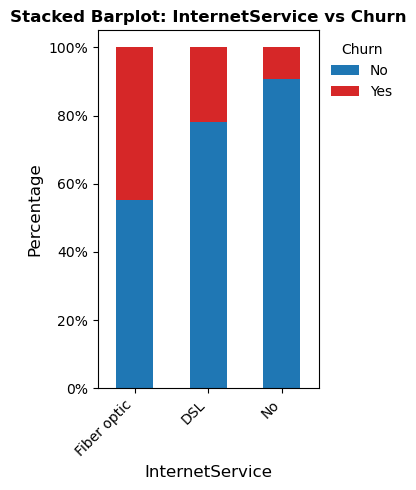

************************************************************************************************************************
Churn                  No   Yes    All
OnlineSecurity                        
All                  8634  3394  12028
No                   3598  2711   6309
Yes                  2484   418   2902
No internet service  2552   265   2817
------------------------------------------------------------------------------------------------------------------------


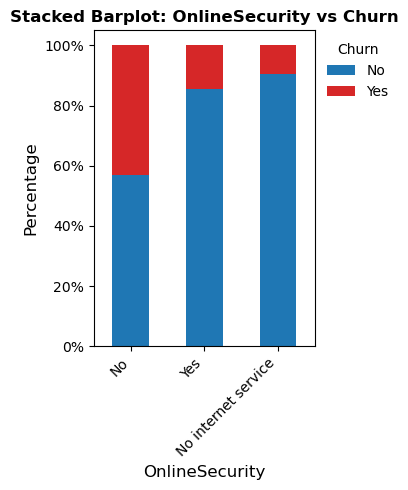

************************************************************************************************************************
Churn                  No   Yes    All
OnlineBackup                          
All                  8634  3394  12028
No                   3544  2404   5948
Yes                  2538   725   3263
No internet service  2552   265   2817
------------------------------------------------------------------------------------------------------------------------


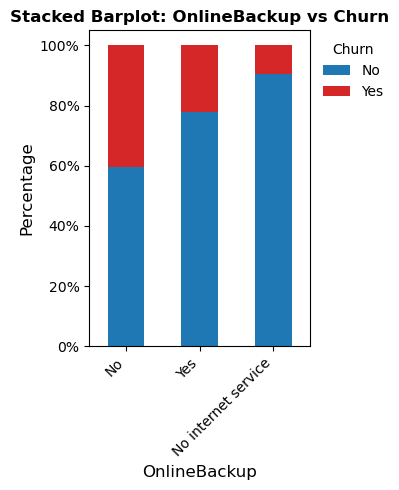

************************************************************************************************************************
Churn                  No   Yes    All
DeviceProtection                      
All                  8634  3394  12028
No                   2586  2016   4602
Yes                  3496  1113   4609
No internet service  2552   265   2817
------------------------------------------------------------------------------------------------------------------------


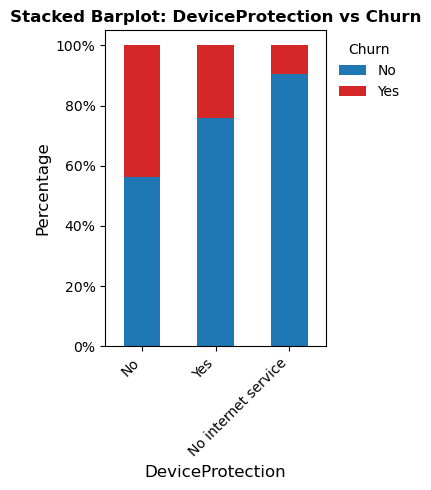

************************************************************************************************************************
Churn                  No   Yes    All
TechSupport                           
All                  8634  3394  12028
No                   3477  2744   6221
Yes                  2605   385   2990
No internet service  2552   265   2817
------------------------------------------------------------------------------------------------------------------------


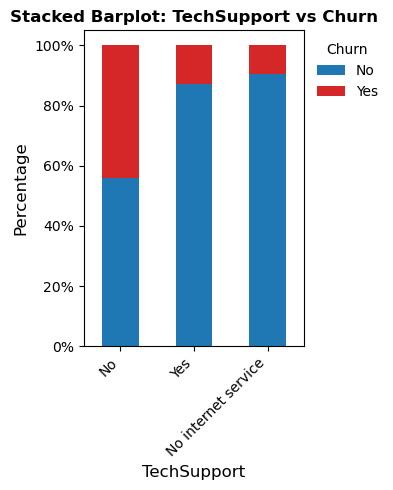

************************************************************************************************************************
Churn                  No   Yes    All
StreamingTV                           
All                  8634  3394  12028
No                   3003  1993   4996
Yes                  3079  1136   4215
No internet service  2552   265   2817
------------------------------------------------------------------------------------------------------------------------


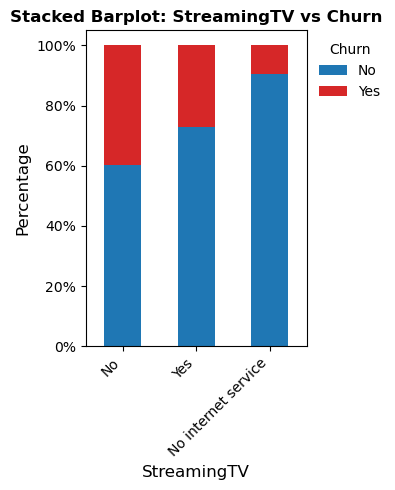

************************************************************************************************************************
Churn                  No   Yes    All
StreamingMovies                       
All                  8634  3394  12028
No                   3001  2048   5049
Yes                  3081  1081   4162
No internet service  2552   265   2817
------------------------------------------------------------------------------------------------------------------------


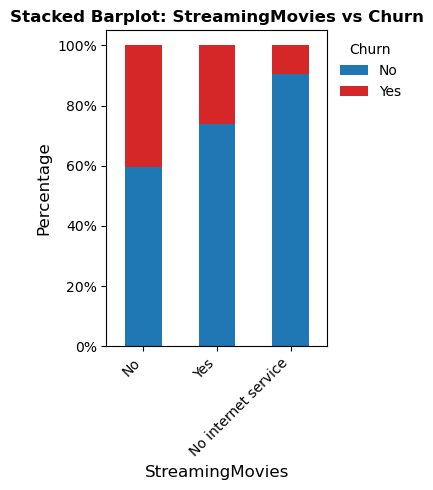

************************************************************************************************************************
Churn             No   Yes    All
Contract                         
All             8634  3394  12028
Month-to-month  3527  3006   6533
One year        2265   290   2555
Two year        2842    98   2940
------------------------------------------------------------------------------------------------------------------------


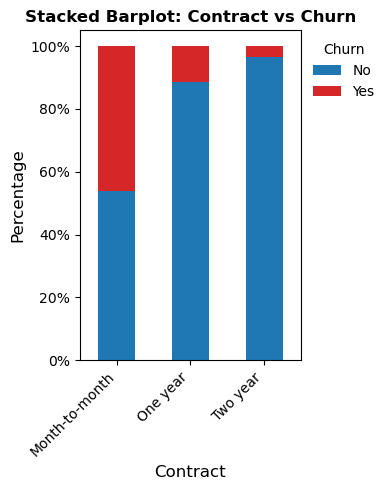

************************************************************************************************************************
Churn               No   Yes    All
PaperlessBilling                   
All               8634  3394  12028
Yes               3929  2215   6144
No                4705  1179   5884
------------------------------------------------------------------------------------------------------------------------


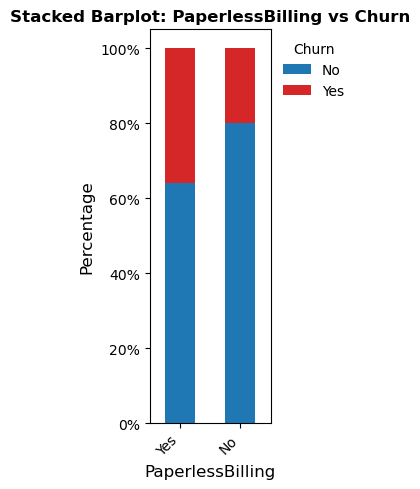

************************************************************************************************************************
Churn                        No   Yes    All
PaymentMethod                               
All                        8634  3394  12028
Electronic check           2106  2030   4136
Mailed check               2002   570   2572
Credit card (automatic)    2516   412   2928
Bank transfer (automatic)  2010   382   2392
------------------------------------------------------------------------------------------------------------------------


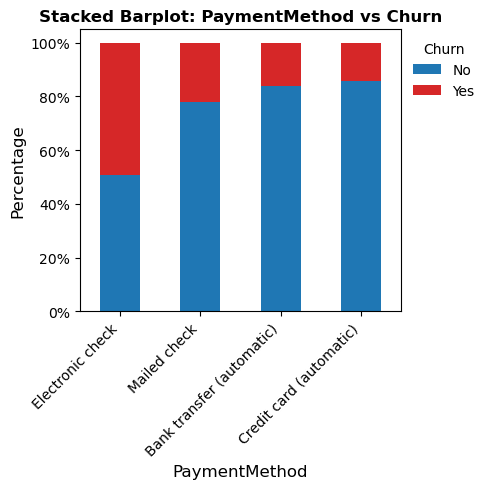

************************************************************************************************************************
Churn    No   Yes    All
Churn                   
Yes       0  3394   3394
All    8634  3394  12028
No     8634     0   8634
------------------------------------------------------------------------------------------------------------------------


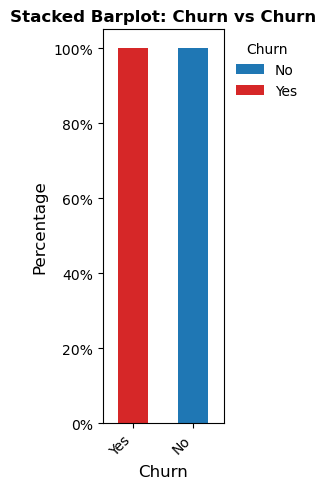

************************************************************************************************************************
Churn                   No   Yes    All
PhoneServiceStatus                     
All                   8634  3394  12028
Multiple phone lines  3852  1684   5536
Single phone line     3803  1383   5186
No phone service       979   327   1306
------------------------------------------------------------------------------------------------------------------------


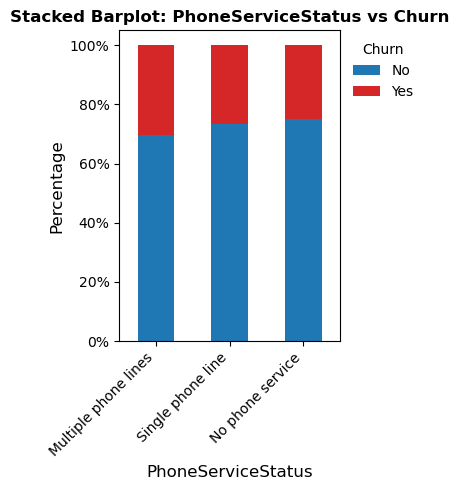

************************************************************************************************************************
Churn            No   Yes    All
IsNewCustomer                   
All            8634  3394  12028
No             8494  3234  11728
Yes             140   160    300
------------------------------------------------------------------------------------------------------------------------


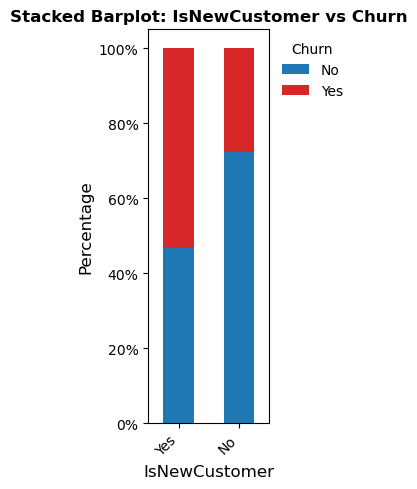

************************************************************************************************************************
Churn          No   Yes    All
TenureGroup                   
All          8634  3394  12028
0–6m         1401  1517   2918
25–48m       2237   614   2851
13–24m       1107   528   1635
7–12m         647   399   1046
49m+         3242   336   3578
------------------------------------------------------------------------------------------------------------------------


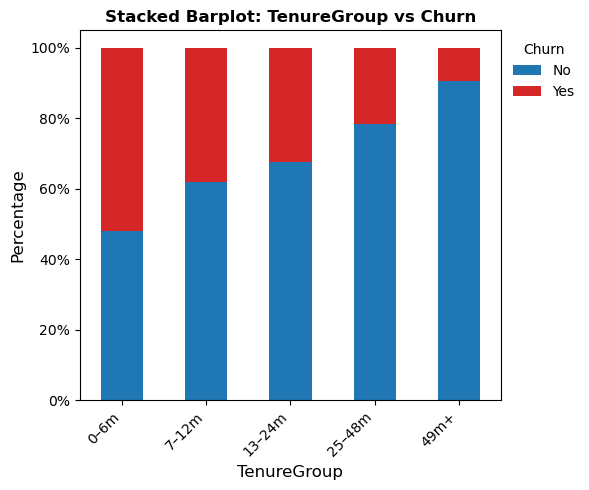

************************************************************************************************************************
Churn                                       No   Yes    All
ContractPaymentCombo                                       
All                                       8634  3394  12028
Month-to-month_Electronic check           1326  1889   3215
Month-to-month_Mailed check                977   509   1486
Month-to-month_Credit card (automatic)     654   313    967
Month-to-month_Bank transfer (automatic)   570   295    865
One year_Electronic check                  513   120    633
One year_Credit card (automatic)           747    71    818
One year_Bank transfer (automatic)         545    55    600
One year_Mailed check                      460    44    504
Two year_Bank transfer (automatic)         895    32    927
Two year_Credit card (automatic)          1115    28   1143
Two year_Electronic check                  267    21    288
Two year_Mailed check                  

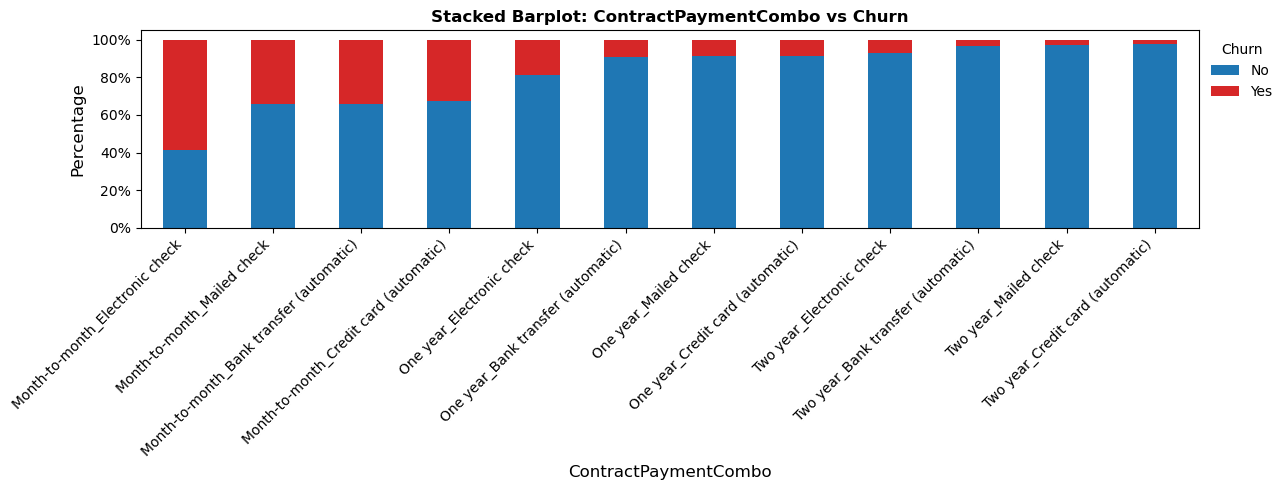

************************************************************************************************************************


In [40]:
for i in cat_cols:
    stacked_barplot(df_data, i, "Churn")
    print('************************************************************************************************************************')

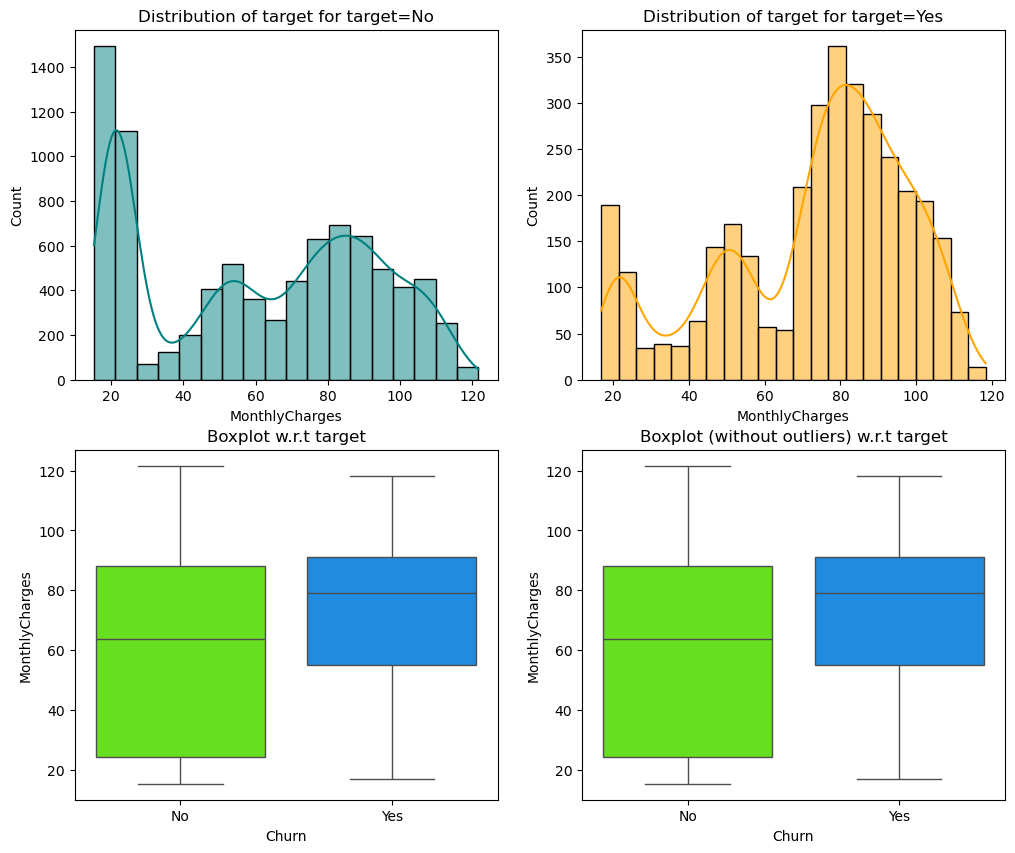

In [41]:
distribution_plot_wrt_target(df_data, predictor='MonthlyCharges', target='Churn')

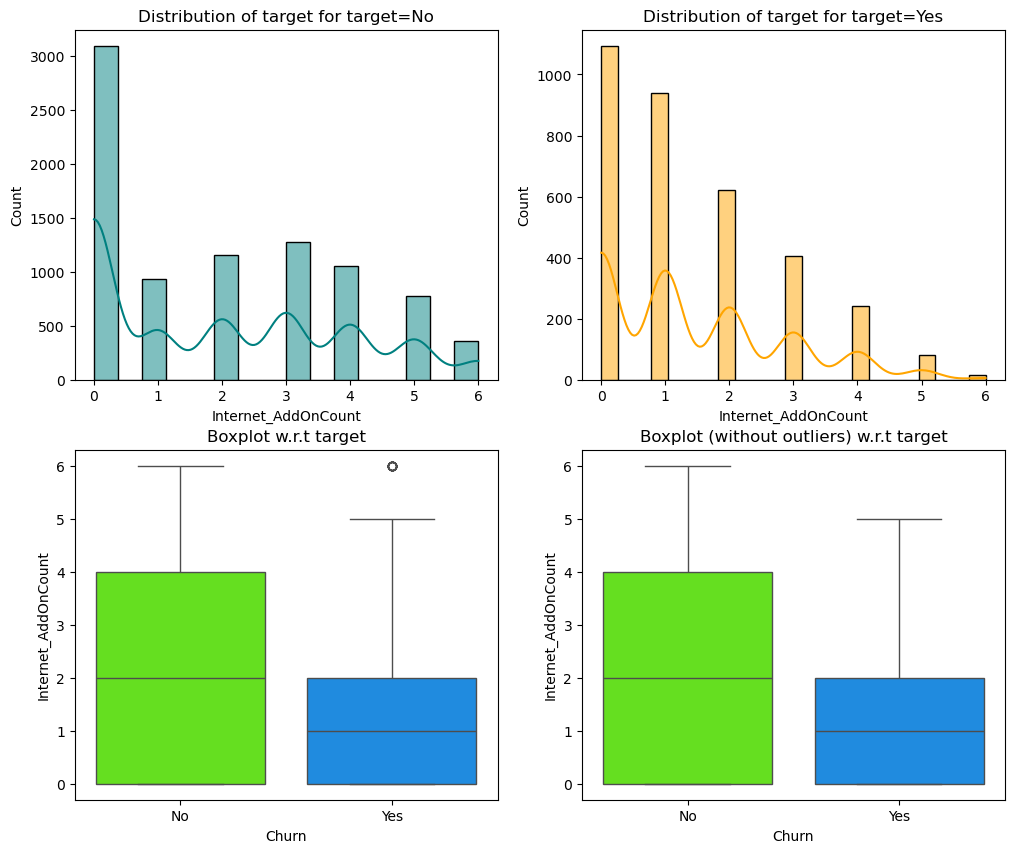

In [42]:
distribution_plot_wrt_target(df_data, predictor='Internet_AddOnCount', target='Churn')

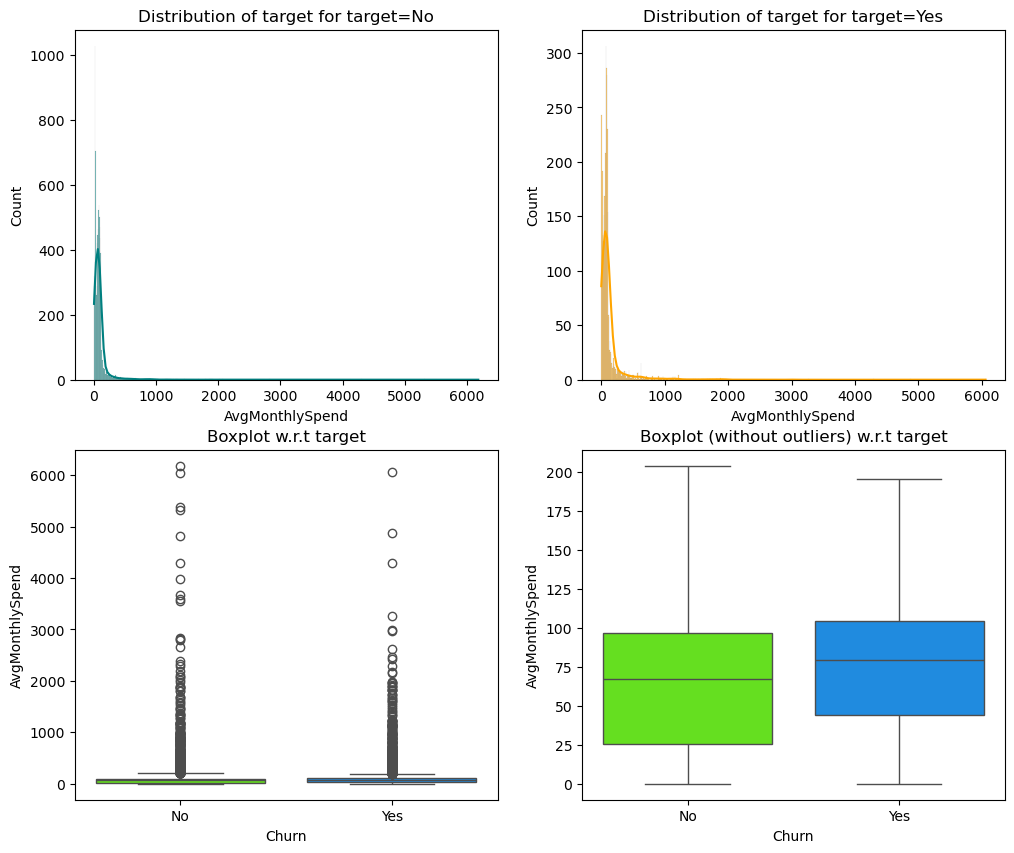

In [43]:
distribution_plot_wrt_target(df_data, predictor='AvgMonthlySpend', target='Churn')

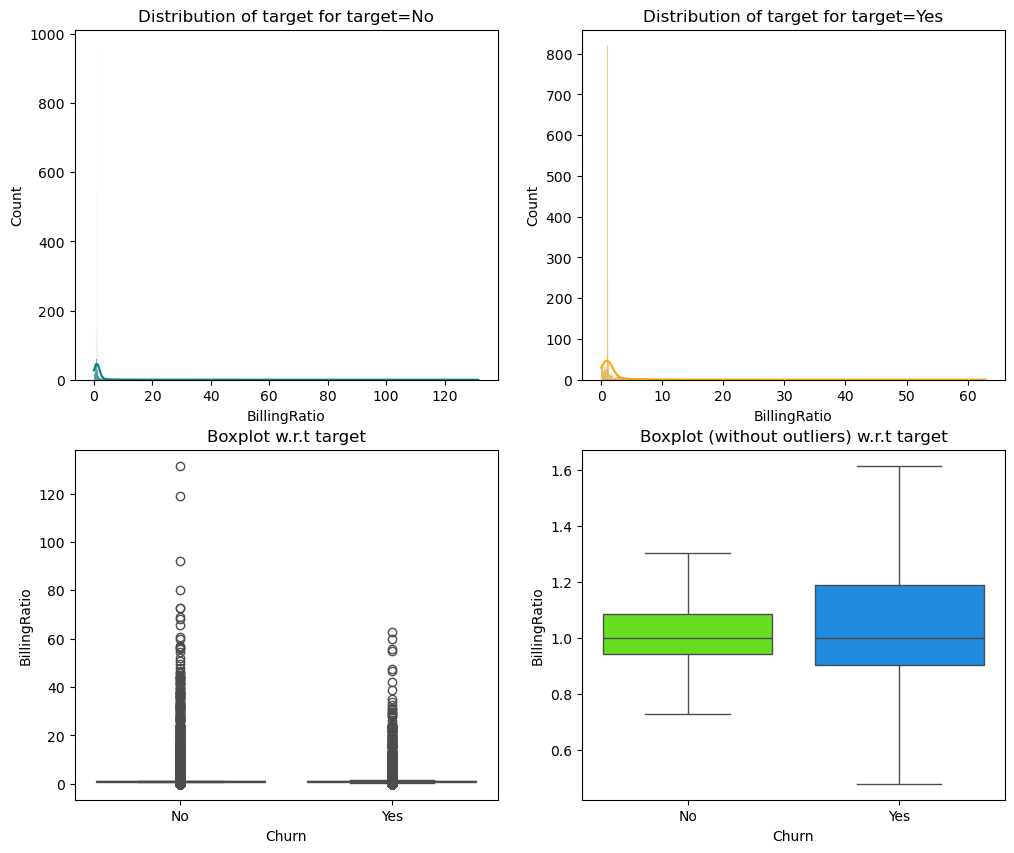

In [44]:
distribution_plot_wrt_target(df_data, predictor='BillingRatio', target='Churn')

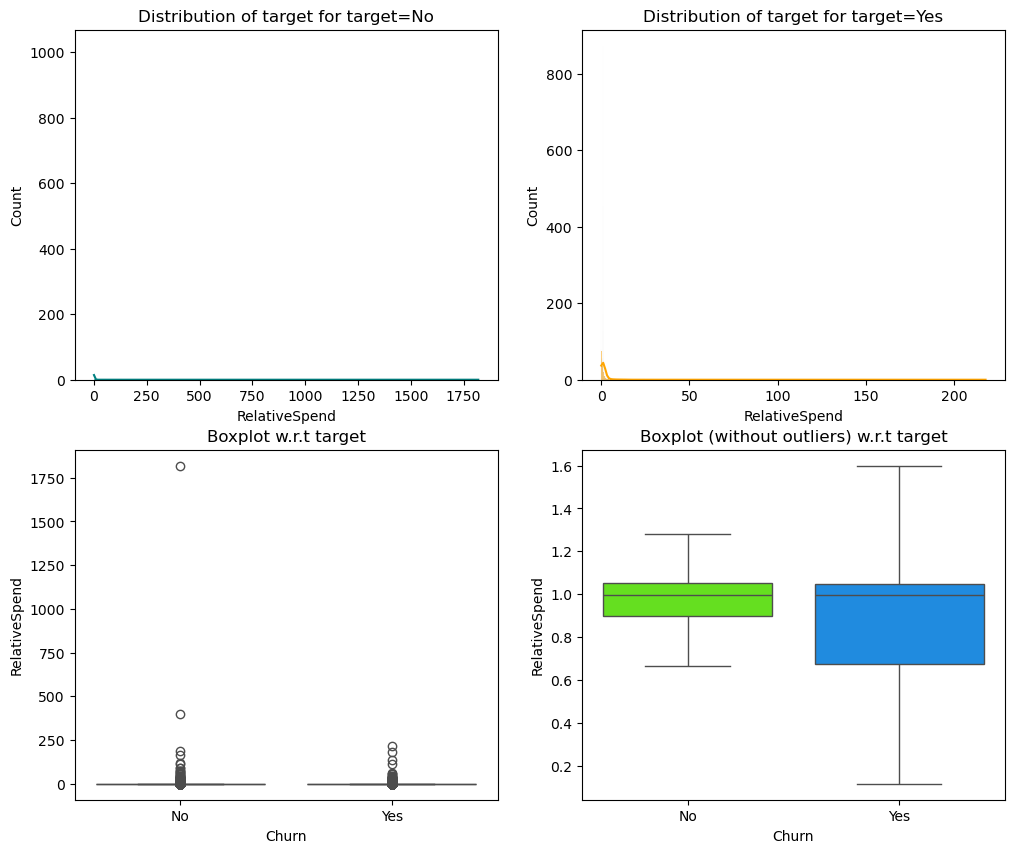

In [45]:
distribution_plot_wrt_target(df_data, predictor='RelativeSpend', target='Churn')

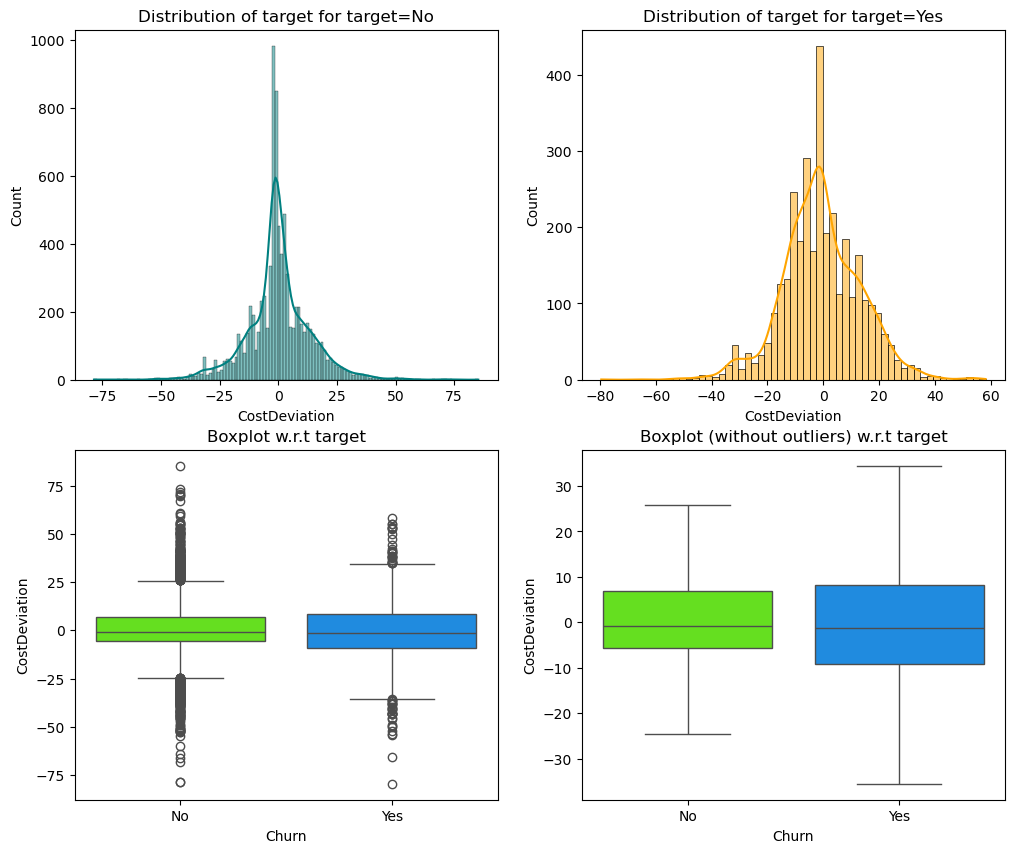

In [46]:
distribution_plot_wrt_target(df_data, predictor='CostDeviation', target='Churn')

### Multivariate Distributions

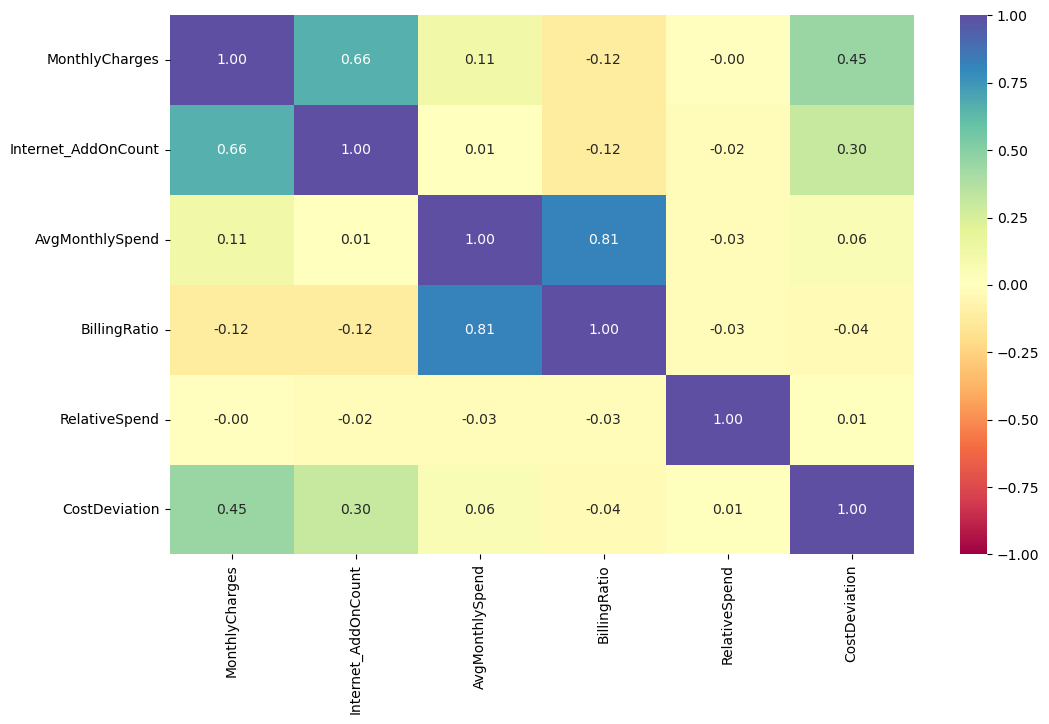

In [47]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

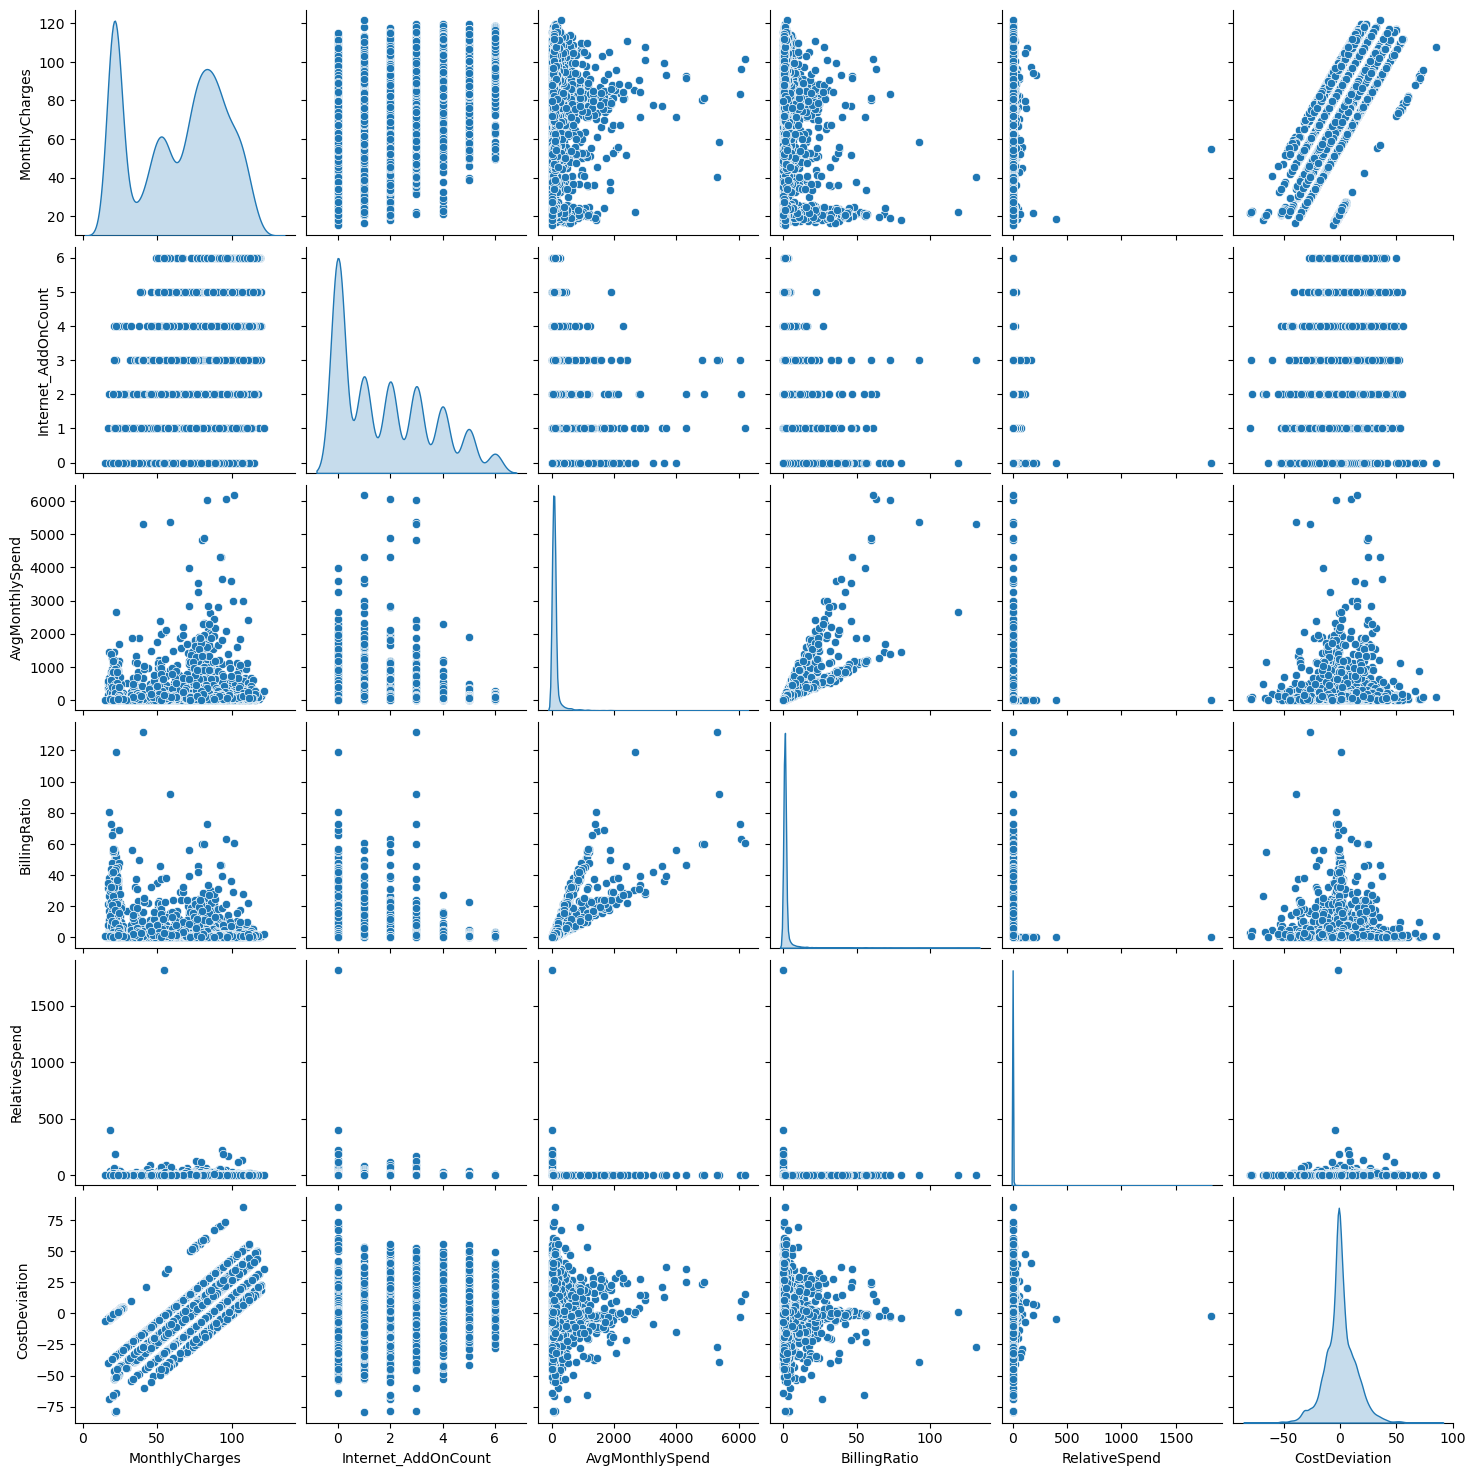

In [48]:
# Plot the Pairplot
sns.pairplot(df_data[num_cols], diag_kind="kde")
plt.show()

## Data Preprocessing

### Outlier Detection

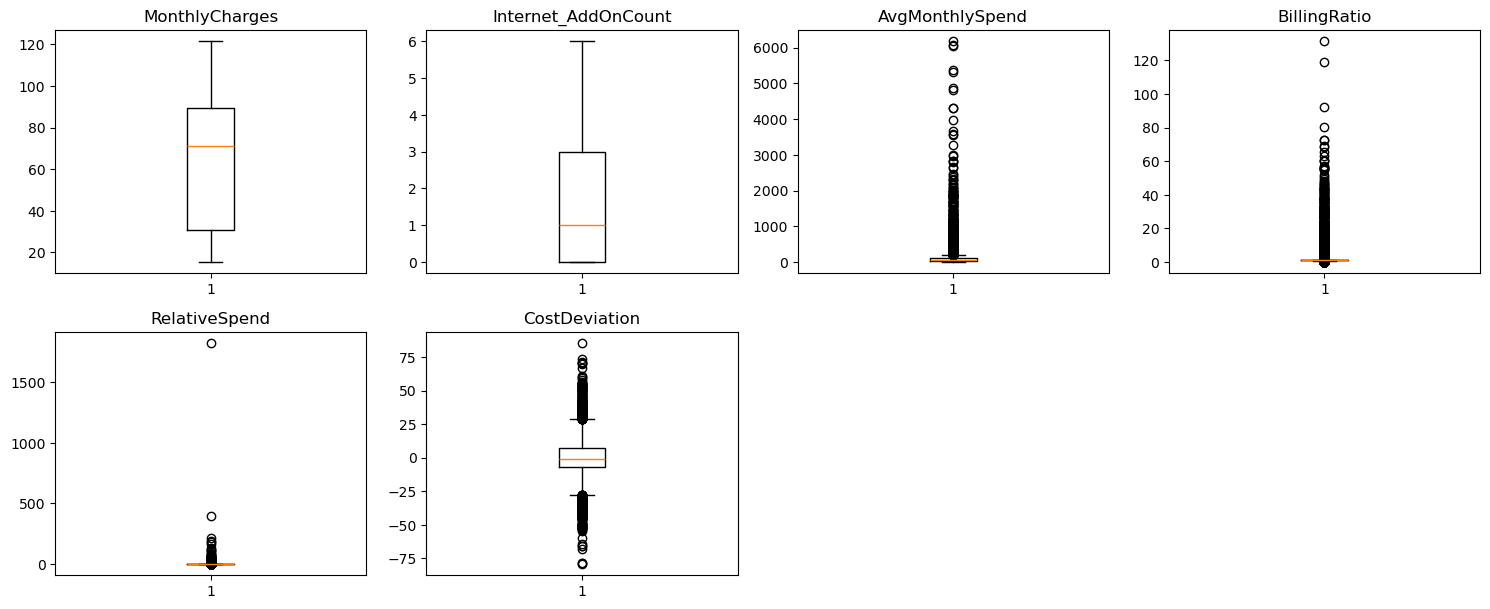

In [49]:
# outlier detection using boxplot
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

# MonthlyCharges, Internet_AddOnCount - no outliers & in limited range | no treatment required
# AvgMonthlySpend - Extremely high values may be the case of high churn outlier Treatment may lose important information. There is no data entry or noise | no treatment recommended
# BillingRatio, RelativeSpend, CostDeviation - Derived ratios | They represent real, valuable customer segments (like premium or high-risk users). Removing them would reduce your model’s ability to learn high-value churn behavior

### Train-Test-Val Split

In [50]:
# creating the copy of the dataframe
df = df_data.copy()
print('Shape of Cleaned dataset:',df.shape)

Shape of Cleaned dataset: (12028, 25)


In [51]:
# reordering Columns - Churn made as last column & reset index
if 'Churn' in df.columns:
    churn = df.pop('Churn')
    df['Churn'] = churn
df.reset_index(drop=True, inplace=True)
df.head()

gender SeniorCitizen Partner Dependents InternetService OnlineSecurity  \
0  Female            No     Yes         No             DSL             No   
1    Male            No      No         No             DSL            Yes   
2    Male            No      No         No             DSL            Yes   
3    Male            No      No         No             DSL            Yes   
4  Female            No      No         No     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0          Yes               No          No          No              No   
1           No              Yes          No          No              No   
2          Yes               No          No          No              No   
3           No              Yes         Yes          No              No   
4           No               No          No          No              No   

         Contract PaperlessBilling              PaymentMethod  MonthlyCharges  \
0  Month-to-month              Yes           Electronic check          29.850   
1        One year               No               Mailed check          56.950   
2  Month-to-month              Yes               Mailed check          53.850   
3        One year               No  Bank transfer (automatic)          42.300   
4  Month-to-month              Yes           Electronic check          70.700   

  PhoneServiceStatus  Internet_AddOnCount IsNewCustomer  AvgMonthlySpend  \
0   No phone service                    1            No           29.850   
1  Single phone line                    2            No           55.574   
2  Single phone line                    2            No           54.075   
3   No phone service                    3            No           40.906   
4  Single phone line                    0            No          628.935   

   BillingRatio  RelativeSpend TenureGroup  \
0         1.000          1.000        0–6m   
1         0.976          1.025      25–48m   
2         1.004          0.996        0–6m   
3         0.967          1.034      25–48m   
4         8.896          0.112        0–6m   

                 ContractPaymentCombo  CostDeviation Churn  
0     Month-to-month_Electronic check        -26.548    No  
1               One year_Mailed check        -10.352    No  
2         Month-to-month_Mailed check         -2.548   Yes  
3  One year_Bank transfer (automatic)        -25.002    No  
4     Month-to-month_Electronic check        -15.651   Yes

In [52]:
# Dividing train data into X and y

X = df.drop(["Churn"], axis=1)
y = df["Churn"]

In [53]:
# Splitting data into training and validation set:

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print('Train dataset shape: ',X_train.shape,'\nValidation dataset shape: ', X_val.shape,'\nTest dataset shape: ', X_test.shape)
print("\nPercentage of classes in Train dataset: ",y_train.value_counts(normalize=True))
print("\nPercentage of classes in Validation dataset: ",y_val.value_counts(normalize=True))
print("\nPercentage of classes in Test dataset: ",y_test.value_counts(normalize=True))

Train dataset shape:  (7216, 24) 
Validation dataset shape:  (2406, 24) 
Test dataset shape:  (2406, 24)

Percentage of classes in Train dataset:  Churn
No    0.718
Yes   0.282
Name: proportion, dtype: float64

Percentage of classes in Validation dataset:  Churn
No    0.718
Yes   0.282
Name: proportion, dtype: float64

Percentage of classes in Test dataset:  Churn
No    0.718
Yes   0.282
Name: proportion, dtype: float64


### Feature Encoding (categorical variables)

In [54]:
#Using OneHotEncoder
cat_cols = X_train.select_dtypes(include=['category']).columns.tolist()

# Initialize OneHotEncoder
# drop='first' avoids multicollinearity
# handle_unknown='ignore'safe if new category appears in val/test
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit encoder only on training categorical data
ohe.fit(X_train[cat_cols])

# Transform all three datasets using the same encoder
encoded_train = ohe.transform(X_train[cat_cols])
encoded_val = ohe.transform(X_val[cat_cols])
encoded_test = ohe.transform(X_test[cat_cols])

# Convert encoded arrays to DataFrames with proper column names
encoded_train_df = pd.DataFrame(encoded_train, columns=ohe.get_feature_names_out(cat_cols), index=X_train.index)
encoded_val_df = pd.DataFrame(encoded_val, columns=ohe.get_feature_names_out(cat_cols), index=X_val.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=ohe.get_feature_names_out(cat_cols), index=X_test.index)

# Drop original categorical columns and concatenate encoded ones
X_train_encoded = pd.concat([X_train.drop(columns=cat_cols), encoded_train_df], axis=1)
X_val_encoded = pd.concat([X_val.drop(columns=cat_cols), encoded_val_df], axis=1)
X_test_encoded = pd.concat([X_test.drop(columns=cat_cols), encoded_test_df], axis=1)

# Verify consistency
print('Encoding Complete!')
print(f"Train shape: {X_train_encoded.shape}")
print(f"Validation shape: {X_val_encoded.shape}")
print(f"Test shape: {X_test_encoded.shape}")

# Check all columns match
assert list(X_train_encoded.columns) == list(X_val_encoded.columns) == list(X_test_encoded.columns), "Encoded columns are misaligned!"
print("Success: Encoded columns are perfectly aligned across all datasets.")

Encoding Complete!
Train shape: (7216, 48)
Validation shape: (2406, 48)
Test shape: (2406, 48)
Success: Encoded columns are perfectly aligned across all datasets.


### Feature Scaling (numerical variables)

In [55]:
# Identify numeric columns
num_cols = ['MonthlyCharges', 'Internet_AddOnCount', 'AvgMonthlySpend', 
            'BillingRatio', 'RelativeSpend', 'CostDeviation']

# Initialize scaler
scaler = RobustScaler()

# Create copies for scaled datasets
X_train_scaled = X_train_encoded.copy()
X_val_scaled   = X_val_encoded.copy()
X_test_scaled  = X_test_encoded.copy()

# Fit scaler only on training data (no leakage)
X_train_scaled[num_cols] = scaler.fit_transform(X_train_encoded[num_cols])

# Transform validation and test sets using the same scaler
X_val_scaled[num_cols] = scaler.transform(X_val_encoded[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test_encoded[num_cols])

# Verify scaling
print("Feature scaling (RobustScaler) complete.")
print(f"Scaled columns: {num_cols}")
print(f"Train shape: {X_train_scaled.shape}, Validation: {X_val_scaled.shape}, Test: {X_test_scaled.shape}")

Feature scaling (RobustScaler) complete.
Scaled columns: ['MonthlyCharges', 'Internet_AddOnCount', 'AvgMonthlySpend', 'BillingRatio', 'RelativeSpend', 'CostDeviation']
Train shape: (7216, 48), Validation: (2406, 48), Test: (2406, 48)


In [56]:
X_train_scaled.head().T

10248  9664   11378  \
MonthlyCharges                                      0.288  0.616  0.347   
Internet_AddOnCount                                -0.333 -0.333 -0.333   
AvgMonthlySpend                                    -0.913  1.025  0.367   
BillingRatio                                       -5.177  1.975  0.391   
RelativeSpend                                      50.354 -1.158 -0.276   
CostDeviation                                       0.164  1.494  0.402   
gender_Male                                         1.000  1.000  1.000   
SeniorCitizen_Yes                                   0.000  1.000  0.000   
Partner_Yes                                         1.000  0.000  0.000   
Dependents_Yes                                      0.000  0.000  0.000   
InternetService_Fiber optic                         1.000  1.000  1.000   
InternetService_No                                  0.000  0.000  0.000   
OnlineSecurity_No internet service                  0.000  0.000  0.000   
OnlineSecurity_Yes                                  0.000  0.000  0.000   
OnlineBackup_No internet service                    0.000  0.000  0.000   
OnlineBackup_Yes                                    0.000  0.000  0.000   
DeviceProtection_No internet service                0.000  0.000  0.000   
DeviceProtection_Yes                                1.000  0.000  0.000   
TechSupport_No internet service                     0.000  0.000  0.000   
TechSupport_Yes                                     0.000  0.000  0.000   
StreamingTV_No internet service                     0.000  0.000  0.000   
StreamingTV_Yes                                     0.000  0.000  0.000   
StreamingMovies_No internet service                 0.000  0.000  0.000   
StreamingMovies_Yes                                 0.000  1.000  1.000   
Contract_One year                                   0.000  0.000  0.000   
Contract_Two year                                   0.000  0.000  0.000   
PaperlessBilling_Yes                                1.000  0.000  1.000   
PaymentMethod_Credit card (automatic)               0.000  0.000  0.000   
PaymentMethod_Electronic check                      1.000  1.000  1.000   
PaymentMethod_Mailed check                          0.000  0.000  0.000   
PhoneServiceStatus_No phone service                 0.000  0.000  0.000   
PhoneServiceStatus_Single phone line                1.000  0.000  0.000   
IsNewCustomer_Yes                                   0.000  0.000  0.000   
TenureGroup_13–24m                                  0.000  0.000  0.000   
TenureGroup_25–48m                                  0.000  1.000  1.000   
TenureGroup_49m+                                    0.000  0.000  0.000   
TenureGroup_7–12m                                   1.000  0.000  0.000   
ContractPaymentCombo_Month-to-month_Credit card...  0.000  0.000  0.000   
ContractPaymentCombo_Month-to-month_Electronic ...  1.000  1.000  1.000   
ContractPaymentCombo_Month-to-month_Mailed check    0.000  0.000  0.000   
ContractPaymentCombo_One year_Bank transfer (au...  0.000  0.000  0.000   
ContractPaymentCombo_One year_Credit card (auto...  0.000  0.000  0.000   
ContractPaymentCombo_One year_Electronic check      0.000  0.000  0.000   
ContractPaymentCombo_One year_Mailed check          0.000  0.000  0.000   
ContractPaymentCombo_Two year_Bank transfer (au...  0.000  0.000  0.000   
ContractPaymentCombo_Two year_Credit card (auto...  0.000  0.000  0.000   
ContractPaymentCombo_Two year_Electronic check      0.000  0.000  0.000   
ContractPaymentCombo_Two year_Mailed check          0.000  0.000  0.000   

                                                    5957   6615   
MonthlyCharges                                     -0.809  0.398  
Internet_AddOnCount                                -0.667  0.333  
AvgMonthlySpend                                    -0.652  0.269  
BillingRatio                                        0.095 -0.213  
RelativeSpend                            

### Class Imbalance Handling

Class distribution in training data:
Churn
No     5180
Yes    2036
Name: count, dtype: int64

Percentage distribution:
Churn
No    71.785
Yes   28.215
Name: proportion, dtype: float64


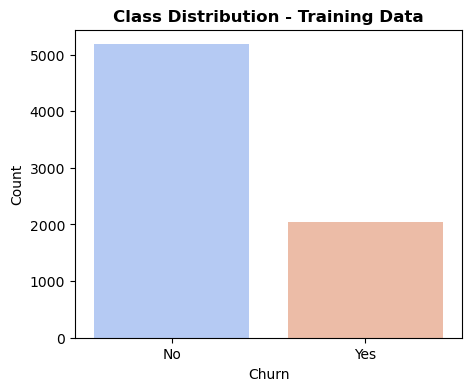

In [57]:
# Check class balance in training labels
print("Class distribution in training data:")
print(y_train.value_counts())
print("\nPercentage distribution:")
print(y_train.value_counts(normalize=True) * 100)

# Optional: visualize
plt.figure(figsize=(5,4))
sns.countplot(x=y_train, palette='coolwarm')
plt.title("Class Distribution - Training Data", fontsize=12, fontweight='bold')
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


After SMOTE:
Churn
No     5180
Yes    5180
Name: count, dtype: int64

Percentage after balancing:
Churn
No    50.000
Yes   50.000
Name: proportion, dtype: float64


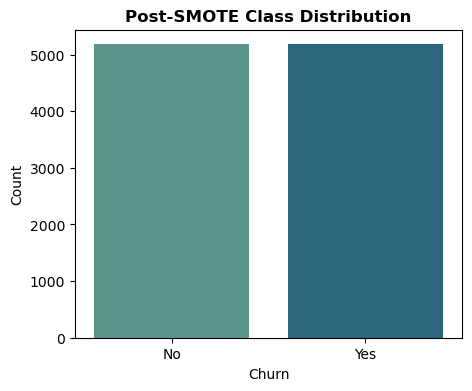

In [58]:
#Apply SMOTE
sm = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=5)
X_train_bal, y_train_bal = sm.fit_resample(X_train_scaled, y_train)

print("\nAfter SMOTE:")
print(y_train_bal.value_counts())
print("\nPercentage after balancing:")
print(y_train_bal.value_counts(normalize=True) * 100)

plt.figure(figsize=(5,4))
sns.countplot(x=y_train_bal, palette='crest')
plt.title("Post-SMOTE Class Distribution", fontsize=12, fontweight='bold')
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [59]:
# Create final copies for modeling
X_train_final = X_train_bal.copy()
y_train_final = y_train_bal.copy()

X_val_final = X_val_scaled.copy()
y_val_final = y_val.copy()

X_test_final = X_test_scaled.copy()
y_test_final = y_test.copy()

print("Final datasets for modeling created successfully!")

# sanity checks
print(f"Train: {X_train_final.shape}, Validation: {X_val_final.shape}, Test: {X_test_final.shape}")
print(f"Train target distribution:\n{y_train_final.value_counts(normalize=True)*100}\n")
print(f"Validation target distribution:\n{y_val_final.value_counts(normalize=True)*100}\n")
print(f"Test target distribution:\n{y_test_final.value_counts(normalize=True)*100}\n")

Final datasets for modeling created successfully!
Train: (10360, 48), Validation: (2406, 48), Test: (2406, 48)
Train target distribution:
Churn
No    50.000
Yes   50.000
Name: proportion, dtype: float64

Validation target distribution:
Churn
No    71.779
Yes   28.221
Name: proportion, dtype: float64

Test target distribution:
Churn
No    71.779
Yes   28.221
Name: proportion, dtype: float64



In [60]:
X_train_final.to_csv("X_train_final.csv", index=False,encoding="utf-8-sig")
y_train_final.to_csv("y_train_final.csv", index=False,encoding="utf-8-sig")

## Model Building – Baseline Model

### Model evaluation criterion

Primary Metric: Recall

- Business perspective: In churn prediction, missing a true churner (false negative) means losing a paying customer.
- Operational impact: It’s better to flag a few loyal customers by mistake (false positives) than to miss an actual churner
- Retention strategy: High recall ensures AlphaCom reaches most customers who are actually about to churn — maximizing the effectiveness of retention campaigns.
- Goal: Maximize Recall (ideally >80%), even if precision slightly decreases.

Seondary Metric: F1-Score

- Improving Precision indicates how many customers predicted as churners actually churned, which helps avoid wasted marketing resources (retention offers to loyal customers).
- F1 Score balances Precision and Recall into one metric.
- Useful when both missed churners (FN) and false alarms (FP) have business cost.

### Functions to output different metrics (including recall) & to show confusion matrix

In [61]:
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]

    acc = accuracy_score(target, class_pred)  # to compute Accuracy
    recall = recall_score(target, class_pred)  # to compute Recall
    precision = precision_score(target, class_pred)  # to compute Precision
    f1 = f1_score(target, class_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [62]:
def plot_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    cm = confusion_matrix(target, class_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [63]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [64]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

#### Model 1 - Logistic Regression

In [65]:
# Define Function to calculate VIF
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [66]:
# Checking Multicollinearity
le = LabelEncoder()
y_train_m1 = le.fit_transform(y_train_final)
y_val_m1 = le.transform(y_val_final)
y_test_m1 = le.transform(y_test_final)

X_train_m1 = X_train_final.copy()
X_val_m1 = X_val_final.copy()
X_test_m1 = X_test_final.copy()

# Call the function to calculate VIF
vif_result = calculate_vif(X_train_m1)
print("Variance Inflation Factors:")
print(vif_result)

Variance Inflation Factors:
                                             Variable     VIF
0                                      MonthlyCharges 186.402
1                                 Internet_AddOnCount  61.586
2                                     AvgMonthlySpend   4.037
3                                        BillingRatio   4.059
4                                       RelativeSpend   1.005
5                                       CostDeviation  39.326
6                                         gender_Male   1.015
7                                   SeniorCitizen_Yes   1.100
8                                         Partner_Yes   1.344
9                                      Dependents_Yes   1.265
10                        InternetService_Fiber optic  48.744
11                                 InternetService_No     inf
12                 OnlineSecurity_No internet service     inf
13                                 OnlineSecurity_Yes   4.794
14                   OnlineBackup_No inter

In [67]:
%%time
# Dropping columns with VIF > 5 iteratively
i_vif = 0
while vif_result['VIF'].max() > 5: 
     high_vif_column = vif_result.loc[vif_result['VIF'].idxmax(), 'Variable']
     print("\nDropping ",high_vif_column," due to high VIF")
     X_train_m1.drop(columns=high_vif_column, inplace=True)
     X_val_m1.drop(columns=high_vif_column, inplace=True)
     X_test_m1.drop(columns=high_vif_column, inplace=True)
     vif_result = calculate_vif(X_train_m1)
     i_vif = i_vif + 1
     print('\nIteration: ',i_vif,' | \n','VIF Result',vif_result)
print('\nVIF Check Complete')


Dropping  InternetService_No  due to high VIF

Iteration:  1  | 
 VIF Result                                              Variable     VIF
0                                      MonthlyCharges 186.402
1                                 Internet_AddOnCount  61.586
2                                     AvgMonthlySpend   4.037
3                                        BillingRatio   4.059
4                                       RelativeSpend   1.005
5                                       CostDeviation  39.326
6                                         gender_Male   1.015
7                                   SeniorCitizen_Yes   1.100
8                                         Partner_Yes   1.344
9                                      Dependents_Yes   1.265
10                        InternetService_Fiber optic  48.744
11                 OnlineSecurity_No internet service     inf
12                                 OnlineSecurity_Yes   4.794
13                   OnlineBackup_No internet service 

In [68]:
#adding constants before building Logistic Model

X_train_m1 = statmod.add_constant(X_train_m1, has_constant='add')
X_val_m1 = statmod.add_constant(X_val_m1, has_constant='add')
X_test_m1 = statmod.add_constant(X_test_m1, has_constant='add')

LogisticReg = statmod.Logit(y_train_m1, X_train_m1).fit()
print(LogisticReg.summary())

Optimization terminated successfully.
         Current function value: 0.449573
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10360
Model:                          Logit   Df Residuals:                    10324
Method:                           MLE   Df Model:                           35
Date:                Sat, 25 Oct 2025   Pseudo R-squ.:                  0.3514
Time:                        16:34:02   Log-Likelihood:                -4657.6
converged:                       True   LL-Null:                       -7181.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const     

In [69]:
%%time
#Dealing with high p-value variables
m1_predictors = X_train_m1.copy()
cols = m1_predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_m1_aux = m1_predictors[cols]

    # fitting the model
    m1_Pval = statmod.Logit(y_train_m1, X_train_m1_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = m1_Pval.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
        print("Dropping column ",feature_with_p_max," with p-value: ",max_p_value)
    else:
        break

selected_features = cols
print(selected_features)

Optimization terminated successfully.
         Current function value: 0.449573
         Iterations 7
Dropping column  IsNewCustomer_Yes  with p-value:  0.867495548164718
Optimization terminated successfully.
         Current function value: 0.449574
         Iterations 7
Dropping column  gender_Male  with p-value:  0.7833651267845947
Optimization terminated successfully.
         Current function value: 0.449578
         Iterations 7
Dropping column  AvgMonthlySpend  with p-value:  0.7326706402054493
Optimization terminated successfully.
         Current function value: 0.449583
         Iterations 7
Dropping column  PhoneServiceStatus_No phone service  with p-value:  0.5498272616638058
Optimization terminated successfully.
         Current function value: 0.449601
         Iterations 7
Dropping column  ContractPaymentCombo_Month-to-month_Mailed check  with p-value:  0.5388366716277079
Optimization terminated successfully.
         Current function value: 0.449619
         Iterations 

In [70]:
X_train_m1 = X_train_m1[selected_features]
X_val_m1 = X_val_m1[selected_features]
X_test_m1 = X_train_m1[selected_features]

m1_logit_tuned = statmod.Logit(y_train_m1,X_train_m1).fit()
print(m1_logit_tuned.summary())

Optimization terminated successfully.
         Current function value: 0.449834
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10360
Model:                          Logit   Df Residuals:                    10334
Method:                           MLE   Df Model:                           25
Date:                Sat, 25 Oct 2025   Pseudo R-squ.:                  0.3510
Time:                        16:34:04   Log-Likelihood:                -4660.3
converged:                       True   LL-Null:                       -7181.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const             

In [71]:
# Calculate odds ratios
odds_ratios = np.exp(m1_logit_tuned.params)
odds_table = pd.DataFrame({
    'Coefficient': m1_logit_tuned.params,
    'Odds Ratio': odds_ratios
})
print('Odds-ratio:- \n',odds_table)

Odds-ratio:- 
                                                     Coefficient  Odds Ratio
const                                                     1.334       3.795
BillingRatio                                             -0.006       0.994
CostDeviation                                             0.156       1.169
SeniorCitizen_Yes                                         0.219       1.244
Dependents_Yes                                           -0.210       0.811
InternetService_Fiber optic                               0.983       2.673
OnlineSecurity_Yes                                       -0.555       0.574
OnlineBackup_Yes                                         -0.360       0.697
DeviceProtection_Yes                                     -0.181       0.835
TechSupport_Yes                                          -0.618       0.539
StreamingMovies_No internet service                      -1.256       0.285
PaperlessBilling_Yes                                      0.321       1.3

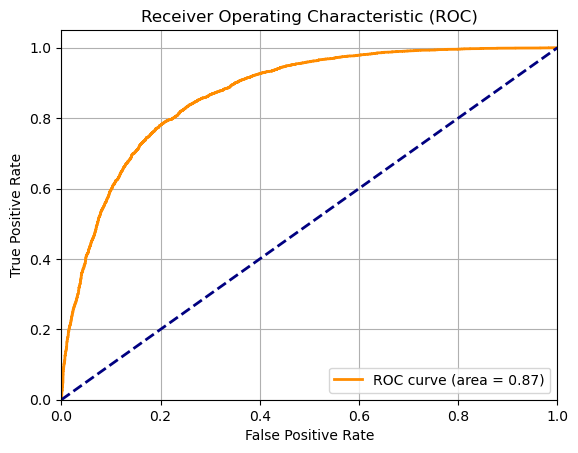

In [72]:
y_pred_m1 = m1_logit_tuned.predict(X_train_m1)
fpr, tpr, thresholds = roc_curve(y_train_m1, y_pred_m1)

# Plot ROC curve
roc_auc = roc_auc_score(y_train_m1, y_pred_m1)  ## get the ROC-AUC score
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [73]:
# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
print("\nOptimal Threshold: ", optimal_threshold_logit)


Optimal Threshold:  0.546


In [74]:
# Checking Model Performance on Training dataset
m1_logit_perf_train = model_performance_classification(
    m1_logit_tuned, X_train_m1, y_train_m1, optimal_threshold_logit
)
m1_logit_perf_train

Accuracy  Recall  Precision    F1
0     0.791   0.785      0.794 0.789

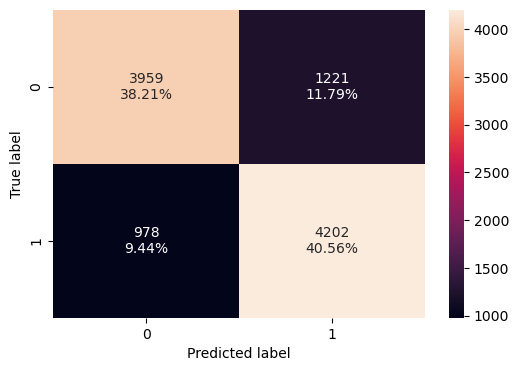

In [75]:
plot_confusion_matrix(m1_logit_tuned, X_train_m1, y_train_m1)

In [76]:
# Checking Model Performance on Validation dataset
m1_logit_perf_val = model_performance_classification(
    m1_logit_tuned, X_val_m1, y_val_m1, optimal_threshold_logit
)
m1_logit_perf_val

Accuracy  Recall  Precision    F1
0     0.779   0.757      0.583 0.659

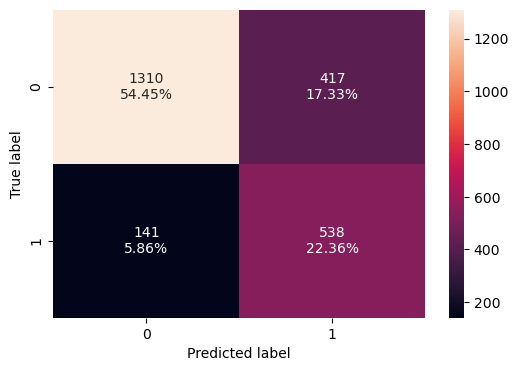

In [77]:
plot_confusion_matrix(m1_logit_tuned, X_val_m1, y_val_m1)

#### Model 2 - Ridge Logistic Regression (L2) — Recall-optimized CV

In [78]:
%%time
le = LabelEncoder()
y_train_m2 = le.fit_transform(y_train_final)
y_val_m2 = le.transform(y_val_final)
y_test_m2 = le.transform(y_test_final)

X_train_m2 = X_train_final.copy()
X_val_m2 = X_val_final.copy()
X_test_m2 = X_test_final.copy()

m2_logit = LogisticRegressionCV(
    Cs=np.logspace(-3, 3, 10),   # search C from 0.001 to 1000
    cv=5,
    penalty='l2',
    solver='lbfgs',              # good for L2
    scoring='recall',            # optimize recall
    max_iter=2000,
    n_jobs=-1,
    random_state=42
)
m2_logit.fit(X_train_m2, y_train_m2)

print("Best C (Ridge):", m2_logit.C_[0])

Best C (Ridge): 2.154434690031882
CPU times: total: 125 ms
Wall time: 5.88 s


In [79]:
# Checking Model Performance on Training dataset
m2_logit_perf_train = model_performance_classification(
    m2_logit, X_train_m2, y_train_m2
)
m2_logit_perf_train

Accuracy  Recall  Precision    F1
0     0.788   0.812      0.774 0.793

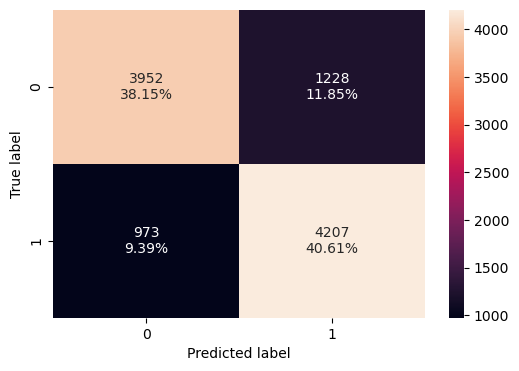

In [80]:
plot_confusion_matrix(m2_logit, X_train_m2, y_train_m2)

In [81]:
# Checking Model Performance on Validation dataset
m2_logit_perf_val = model_performance_classification(
    m2_logit, X_val_m2, y_val_m2
)
m2_logit_perf_val

Accuracy  Recall  Precision    F1
0     0.766   0.789      0.561 0.656

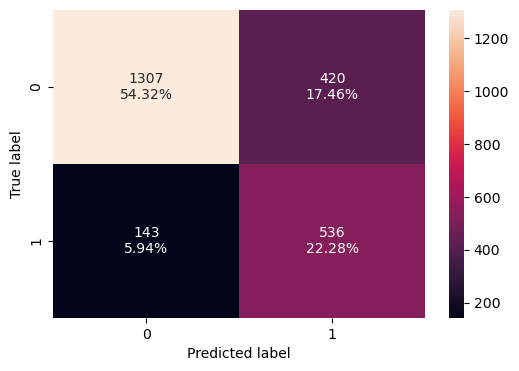

In [82]:
plot_confusion_matrix(m2_logit, X_val_m2, y_val_m2)

#### Model 3 - Lasso Logistic Regression (L1) — Recall-optimized CV

In [83]:
%%time
le = LabelEncoder()
y_train_m3 = le.fit_transform(y_train_final)
y_val_m3 = le.transform(y_val_final)
y_test_m3 = le.transform(y_test_final)

X_train_m3 = X_train_final.copy()
X_val_m3 = X_val_final.copy()
X_test_m3 = X_test_final.copy()

m3_logit = LogisticRegressionCV(
    Cs=np.logspace(-3, 3, 10),
    cv=5,
    penalty='l1',
    solver='liblinear',          # supports L1
    scoring='recall',            # optimize recall
    max_iter=2000,
    n_jobs=-1,
    random_state=42
)
m3_logit.fit(X_train_m3, y_train_m3)

print("Best C (Lasso):", m3_logit.C_[0])

Best C (Lasso): 0.46415888336127775
CPU times: total: 875 ms
Wall time: 7.4 s


In [84]:
# Checking Model Performance on Training dataset
m3_logit_perf_train = model_performance_classification(
    m3_logit, X_train_m3, y_train_m3
)
m3_logit_perf_train

Accuracy  Recall  Precision    F1
0     0.788   0.813      0.774 0.793

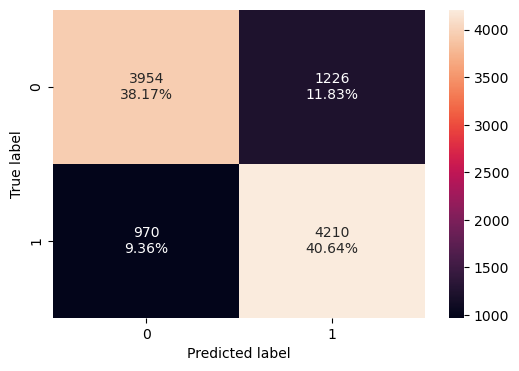

In [85]:
plot_confusion_matrix(m3_logit, X_train_m3, y_train_m3)

In [86]:
# Checking Model Performance on Validation dataset
m3_logit_perf_val = model_performance_classification(
    m3_logit, X_val_m3, y_val_m3
)
m3_logit_perf_val

Accuracy  Recall  Precision    F1
0     0.766   0.791      0.561 0.656

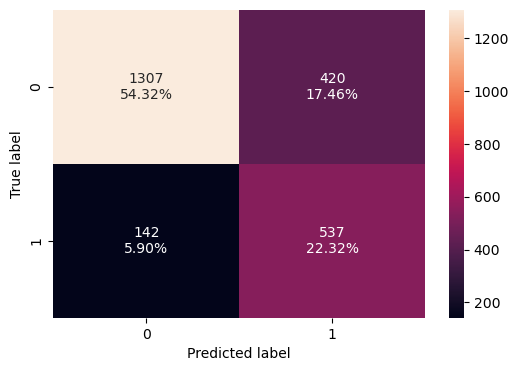

In [87]:
plot_confusion_matrix(m3_logit, X_val_m3, y_val_m3)

#### Model 4 - Elastic Net Logistic Regression (L1 + L2) — Recall-optimized CV

In [88]:
%%time
le = LabelEncoder()
y_train_m4 = le.fit_transform(y_train_final)
y_val_m4 = le.transform(y_val_final)
y_test_m4 = le.transform(y_test_final)

X_train_m4 = X_train_final.copy()
X_val_m4 = X_val_final.copy()
X_test_m4 = X_test_final.copy()

m4_logit = LogisticRegressionCV(
    Cs=np.logspace(-3, 3, 10),
    cv=5,
    penalty='elasticnet',
    solver='saga',               # required for elastic net
    l1_ratios=[0.2, 0.5, 0.8],   # try a few mixes of L1/L2
    scoring='recall',            # optimize recall
    max_iter=5000,               # saga may need more iterations
    n_jobs=-1,
    random_state=42
)
m4_logit.fit(X_train_m4, y_train_m4)

print("Best C (Elastic):", m4_logit.C_[0])
print("Best l1_ratio (Elastic):", m4_logit.l1_ratio_[0])

Best C (Elastic): 0.001
Best l1_ratio (Elastic): 0.5
CPU times: total: 42min 24s
Wall time: 6min 39s


In [89]:
# Checking Model Performance on Training dataset
m4_logit_perf_train = model_performance_classification(
    m4_logit, X_train_m4, y_train_m4
)
m4_logit_perf_train

Accuracy  Recall  Precision    F1
0     0.723   0.796      0.694 0.742

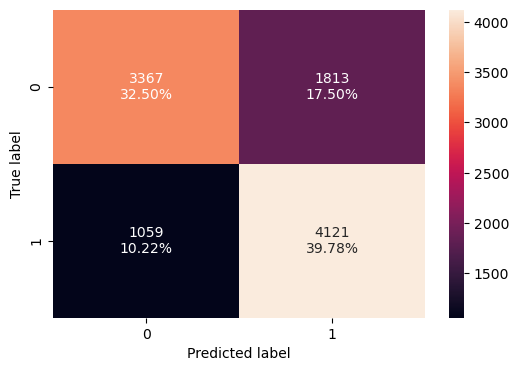

In [90]:
plot_confusion_matrix(m4_logit, X_train_m4, y_train_m4)

In [91]:
# Checking Model Performance on Validation dataset
m4_logit_perf_val = model_performance_classification(
    m4_logit, X_val_m4, y_val_m4
)
m4_logit_perf_val

Accuracy  Recall  Precision    F1
0     0.668   0.764      0.449 0.565

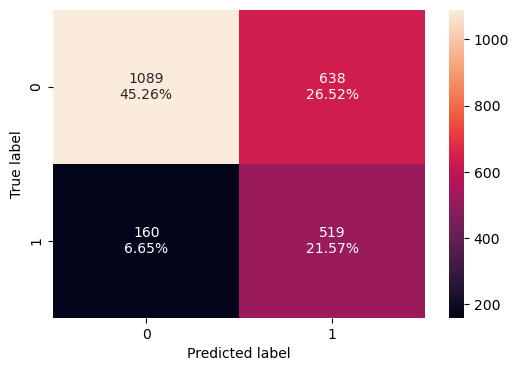

In [92]:
plot_confusion_matrix(m4_logit, X_val_m4, y_val_m4)

## Model Building – Advanced Models

#### Model 5 - Decision Tree

In [93]:
# Make a copy of final datasets & label encode the target variable
le = LabelEncoder()
y_train_m5 = le.fit_transform(y_train_final)
y_val_m5 = le.transform(y_val_final)
y_test_m5 = le.transform(y_test_final)

X_train_m5 = X_train_final.copy()
X_val_m5 = X_val_final.copy()
X_test_m5 = X_test_final.copy()

In [94]:
# Build Decision Tree Model

# Initialize Decision Tree Model
m5_DT = DecisionTreeClassifier(
    criterion='gini',        # Splitting criterion ('entropy' can also be tried)
    max_depth=None,          # Let tree expand fully first; can tune later
    min_samples_split=2,     # Minimum samples needed to split an internal node
    min_samples_leaf=1,      # Minimum samples required at a leaf node
    random_state=42          # For reproducibility
)

# Fit the model
m5_DT.fit(X_train_m5, y_train_m5)

DecisionTreeClassifier(random_state=42)

In [95]:
# Checking Model Performance on Training dataset
m5_DT_perf_train = model_performance_classification_sklearn(m5_DT, X_train_m5, y_train_m5)
m5_DT_perf_train

Accuracy  Recall  Precision    F1
0     1.000   0.999      1.000 1.000

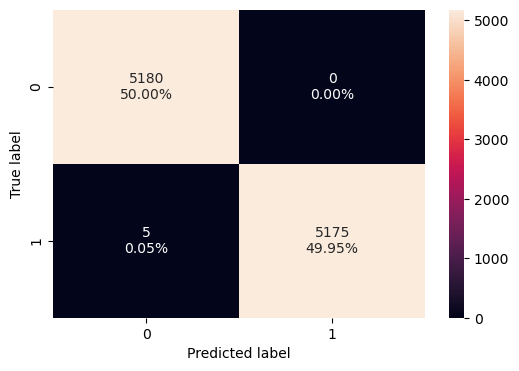

In [96]:
plot_confusion_matrix(m5_DT, X_train_m5, y_train_m5)

In [97]:
# Checking Model Performance on Validation dataset
m5_DT_perf_val = model_performance_classification_sklearn(m5_DT, X_val_m5, y_val_m5)
m5_DT_perf_val

Accuracy  Recall  Precision    F1
0     0.719   0.539      0.503 0.520

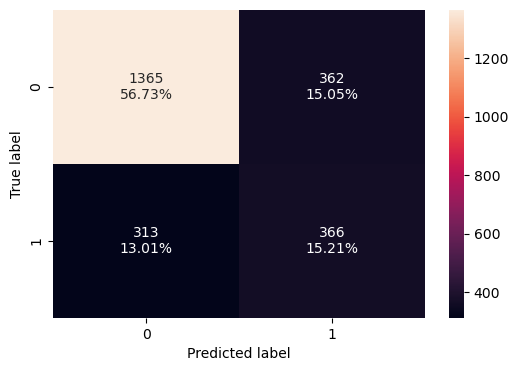

In [98]:
plot_confusion_matrix(m5_DT, X_val_m5, y_val_m5)

#### Model 6 - Bagging

In [99]:
# Make a copy of final datasets & label encode the target variable
le = LabelEncoder()
y_train_m6 = le.fit_transform(y_train_final)
y_val_m6 = le.transform(y_val_final)
y_test_m6 = le.transform(y_test_final)

X_train_m6 = X_train_final.copy()
X_val_m6 = X_val_final.copy()
X_test_m6 = X_test_final.copy()

In [100]:
# Building Bagging Classifier Model

# Initialize base estimator (Decision Tree)
base_tree = DecisionTreeClassifier(
    criterion='gini',
    random_state=42
)

# Initialize Bagging model
m6_Bag = BaggingClassifier(
    estimator=base_tree,
    n_estimators=100,       # number of base learners (trees)
    max_samples=1.0,        # fraction of samples per tree
    max_features=1.0,       # fraction of features per tree
    bootstrap=True,         # with replacement sampling
    random_state=42,
    n_jobs=-1               # parallel processing
)

# Fit the Bagging model
m6_Bag.fit(X_train_m6, y_train_m6)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, n_jobs=-1, random_state=42)

In [101]:
# Checking Model Performance on Training dataset
m6_Bag_perf_train = model_performance_classification_sklearn(m6_Bag, X_train_m6, y_train_m6)
m6_Bag_perf_train

Accuracy  Recall  Precision    F1
0     0.999   1.000      0.999 0.999

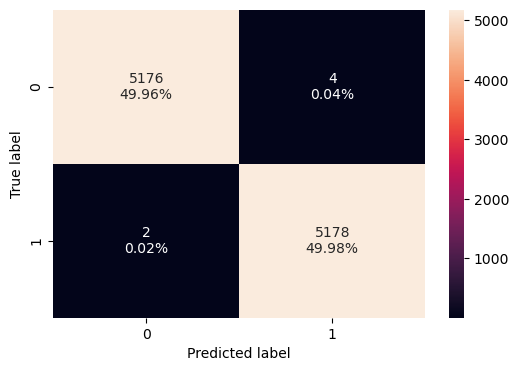

In [102]:
plot_confusion_matrix(m6_Bag, X_train_m6, y_train_m6)

In [103]:
# Checking Model Performance on Validation dataset
m6_Bag_perf_val = model_performance_classification_sklearn(m6_Bag, X_val_m6, y_val_m6)
m6_Bag_perf_val

Accuracy  Recall  Precision    F1
0     0.765   0.582      0.584 0.583

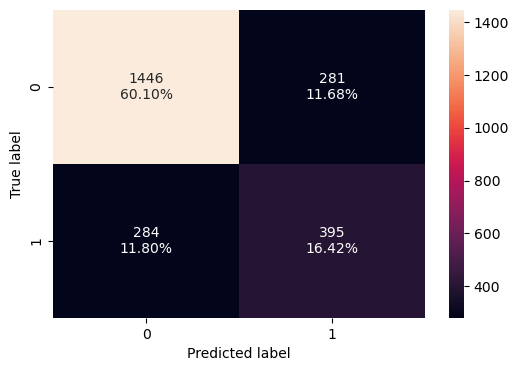

In [104]:
plot_confusion_matrix(m6_Bag, X_val_m6, y_val_m6)

#### Model 7 - Random Forest

In [105]:
# Make a copy of final datasets & label encode the target variable
le = LabelEncoder()
y_train_m7 = le.fit_transform(y_train_final)
y_val_m7 = le.transform(y_val_final)
y_test_m7 = le.transform(y_test_final)

X_train_m7 = X_train_final.copy()
X_val_m7 = X_val_final.copy()
X_test_m7 = X_test_final.copy()

In [106]:
# Building Random Forest Classifier Model

# Initialize Random Forest model
m7_RF = RandomForestClassifier(
    n_estimators=200,        # number of trees in the forest
    criterion='gini',        # splitting criterion
    max_depth=None,          # trees grow fully (can tune later)
    min_samples_split=2,     # minimum samples to split an internal node
    min_samples_leaf=1,      # minimum samples at leaf nodes
    max_features='sqrt',     # best practice for classification (sqrt of total features)
    bootstrap=True,          # bootstrap sampling for bagging
    random_state=42,         # reproducibility
    n_jobs=-1                # use all processors
)

# Fit the model
m7_RF.fit(X_train_m7, y_train_m7)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [107]:
# Checking Model Performance on Training dataset
m7_RF_perf_train = model_performance_classification_sklearn(m7_RF, X_train_m7, y_train_m7)
m7_RF_perf_train

Accuracy  Recall  Precision    F1
0     1.000   1.000      0.999 1.000

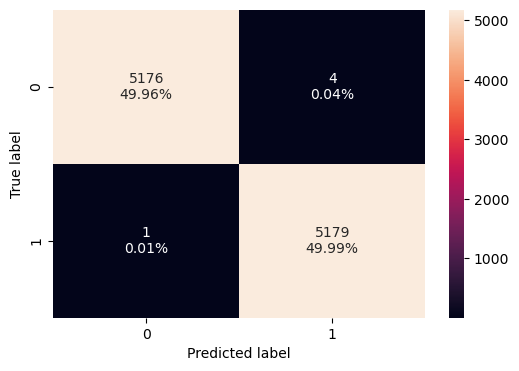

In [108]:
plot_confusion_matrix(m7_RF, X_train_m7, y_train_m7)

In [109]:
# Checking Model Performance on Validation dataset
m7_RF_perf_val = model_performance_classification_sklearn(m7_RF, X_val_m7, y_val_m7)
m7_RF_perf_val

Accuracy  Recall  Precision    F1
0     0.785   0.589      0.627 0.607

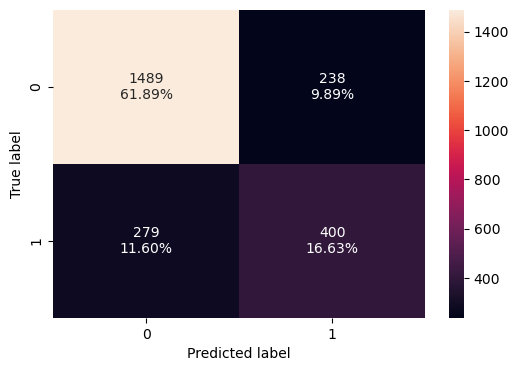

In [110]:
plot_confusion_matrix(m7_RF, X_val_m7, y_val_m7)

#### Model 8 - AdaBoost

In [111]:
# Make a copy of final datasets & label encode the target variable
le = LabelEncoder()
y_train_m8 = le.fit_transform(y_train_final)
y_val_m8 = le.transform(y_val_final)
y_test_m8 = le.transform(y_test_final)

X_train_m8 = X_train_final.copy()
X_val_m8 = X_val_final.copy()
X_test_m8 = X_test_final.copy()

In [112]:
# Building AdaBoost Classifier Model

# Initialize the base estimator (weak learner)
base_estimator = DecisionTreeClassifier(
    max_depth=1,             # simple stump; prevents overfitting
    criterion='gini',
    random_state=42
)

# Initialize the AdaBoost model
m8_Ada = AdaBoostClassifier(
    estimator=base_estimator, # weak learner
    n_estimators=200,         # number of weak learners
    learning_rate=0.1,        # step size for weight updates
    random_state=42
)

# Fit the model
m8_Ada.fit(X_train_m8, y_train_m8)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.1, n_estimators=200, random_state=42)

In [113]:
# Checking Model Performance on Training dataset
m8_Ada_perf_train = model_performance_classification_sklearn(m8_Ada, X_train_m8, y_train_m8)
m8_Ada_perf_train

Accuracy  Recall  Precision    F1
0     0.822   0.842      0.811 0.826

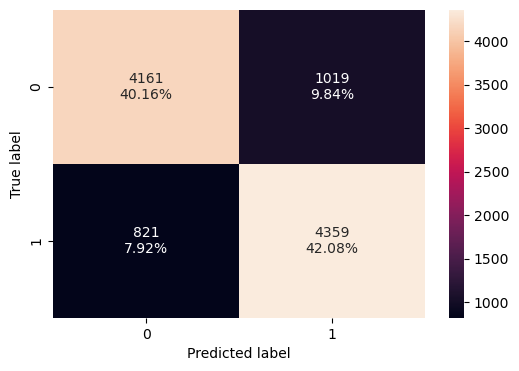

In [114]:
plot_confusion_matrix(m8_Ada, X_train_m8, y_train_m8)

In [115]:
# Checking Model Performance on Validation dataset
m8_Ada_perf_val = model_performance_classification_sklearn(m8_Ada, X_val_m8, y_val_m8)
m8_Ada_perf_val

Accuracy  Recall  Precision    F1
0     0.776   0.739      0.581 0.651

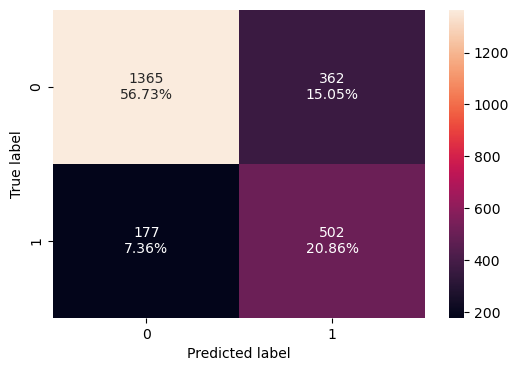

In [116]:
plot_confusion_matrix(m8_Ada, X_val_m8, y_val_m8)

#### Model 9 - Gradient Boosting

In [117]:
# Make a copy of final datasets & label encode the target variable
le = LabelEncoder()
y_train_m9 = le.fit_transform(y_train_final)
y_val_m9 = le.transform(y_val_final)
y_test_m9 = le.transform(y_test_final)

X_train_m9 = X_train_final.copy()
X_val_m9 = X_val_final.copy()
X_test_m9 = X_test_final.copy()

In [118]:
# Building Gradient Boosting Classifier Model

# Initialize Gradient Boosting model
m9_GB = GradientBoostingClassifier(
    loss='log_loss',        # logistic loss for classification
    n_estimators=200,       # number of boosting stages (trees)
    learning_rate=0.05,     # how fast the model learns; lower = slower but safer
    max_depth=3,            # depth of individual regression trees (via max_depth in base learners)
    subsample=1.0,          # 1.0 = no stochastic subsampling; <1.0 can help generalization
    random_state=42
)

# Fit the model
m9_GB.fit(X_train_m9, y_train_m9)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,
                           random_state=42)

In [119]:
# Checking Model Performance on Training dataset
m9_GB_perf_train = model_performance_classification_sklearn(m9_GB, X_train_m9, y_train_m9)
m9_GB_perf_train

Accuracy  Recall  Precision    F1
0     0.864   0.860      0.866 0.863

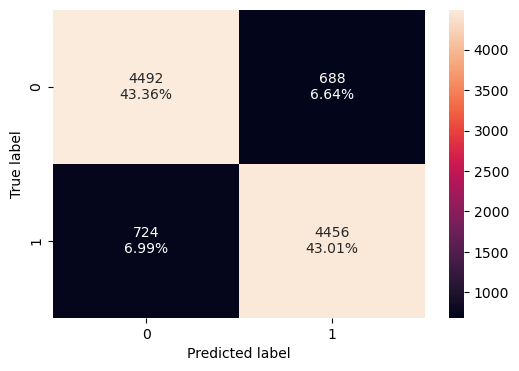

In [120]:
plot_confusion_matrix(m9_GB, X_train_m9, y_train_m9)

In [121]:
# Checking Model Performance on Validation dataset
m9_GB_perf_val = model_performance_classification_sklearn(m9_GB, X_val_m9, y_val_m9)
m9_GB_perf_val

Accuracy  Recall  Precision    F1
0     0.788   0.647      0.619 0.633

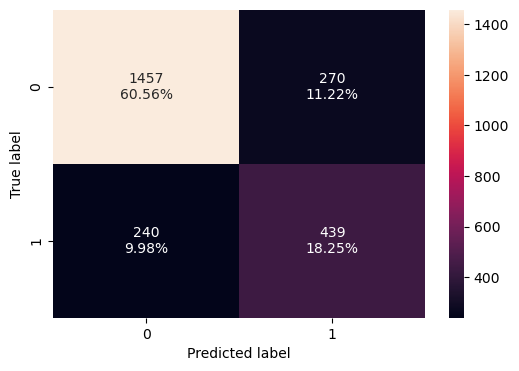

In [122]:
plot_confusion_matrix(m9_GB, X_val_m9, y_val_m9)

#### Model 10 - XGBoost

In [123]:
# Make a copy of final datasets & label encode the target variable
le = LabelEncoder()
y_train_m10 = le.fit_transform(y_train_final)
y_val_m10 = le.transform(y_val_final)
y_test_m10 = le.transform(y_test_final)

X_train_m10 = X_train_final.copy()
X_val_m10 = X_val_final.copy()
X_test_m10 = X_test_final.copy()

In [124]:
%%time
# Building XGBoost Classifier Model
m10_XGB = XGBClassifier(
    n_estimators=300,        # number of boosting trees
    learning_rate=0.05,      # shrinkage / step size
    max_depth=4,             # tree depth (controls complexity)
    subsample=0.8,           # sample % of rows per tree (reduces overfitting)
    colsample_bytree=0.8,    # sample % of features per tree (reduces overfitting)
    reg_lambda=1.0,          # L2 regularization
    reg_alpha=0.0,           # L1 regularization (can tune >0 to encourage sparsity)
    min_child_weight=1,      # min sum of instance weight (min data per leaf)
    objective='binary:logistic',  # binary classification with probability output
    eval_metric='logloss',   # internal eval metric
    random_state=42,
    n_jobs=-1
)

# Fit the model
m10_XGB.fit(X_train_m10, y_train_m10)

CPU times: total: 4.59 s
Wall time: 1.15 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [125]:
# Checking Model Performance on Training dataset
m10_XGB_perf_train = model_performance_classification_sklearn(m10_XGB, X_train_m10, y_train_m10)
m10_XGB_perf_train

Accuracy  Recall  Precision    F1
0     0.883   0.872      0.891 0.882

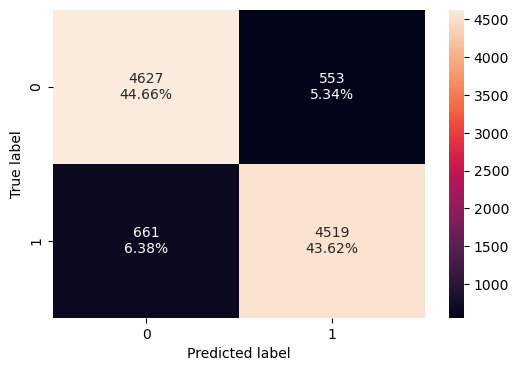

In [126]:
plot_confusion_matrix(m10_XGB, X_train_m10, y_train_m10)

In [127]:
# Checking Model Performance on Validation dataset
m10_XGB_perf_val = model_performance_classification_sklearn(m10_XGB, X_val_m10, y_val_m10)
m10_XGB_perf_val

Accuracy  Recall  Precision    F1
0     0.789   0.610      0.631 0.620

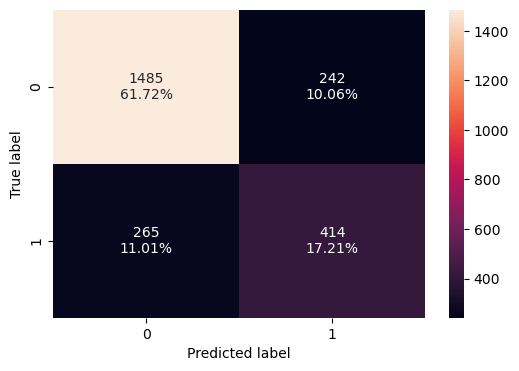

In [224]:
plot_confusion_matrix(m10_XGB, X_val_m10, y_val_m10)

## Model Performance Improvement using Hyperparameter Tuning

#### Compare Model Performance (Baseline + Advanced)

In [208]:
model_comparison_df = []
# Dictionary to map model index
model_names = {
    1: "Logistic Regression (Baseline)",
    2: "Ridge Logistic Regression (L2)",
    3: "Lasso Logistic Regression (L1)",
    4: "Elastic Net Logistic Regression (L1+L2)",
    5: "Decision Tree",
    6: "Bagging Classifier",
    7: "Random Forest",
    8: "AdaBoost",
    9: "Gradient Boosting",
    10: "XGBoost"
}

# Dictionary to map model index
model_perf_dfs = {
    1: (m1_logit_perf_train,  m1_logit_perf_val),
    2: (m2_logit_perf_train,  m2_logit_perf_val),
    3: (m3_logit_perf_train,  m3_logit_perf_val),
    4: (m4_logit_perf_train,  m4_logit_perf_val),
    5: (m5_DT_perf_train,  m5_DT_perf_val),
    6: (m6_Bag_perf_train,  m6_Bag_perf_val),
    7: (m7_RF_perf_train,  m7_RF_perf_val),
    8: (m8_Ada_perf_train,  m8_Ada_perf_val),
    9: (m9_GB_perf_train,  m9_GB_perf_val),
    10: (m10_XGB_perf_train, m10_XGB_perf_val)
}

# Build rows for the final summary table
rows = []

for model_id, (train_df, val_df) in model_perf_dfs.items():
    train_recall = train_df["Recall"].iloc[0]
    val_recall = val_df["Recall"].iloc[0]
    rows.append({
        "Model No.": model_id,
        "Model Name": model_names[model_id],
        "Training Recall":  train_df["Recall"].iloc[0],
        "Validation Recall": val_df["Recall"].iloc[0],
        "Recall Gap (Train-Val)": round(train_recall - val_recall, 4),
        "Training F1":      train_df["F1"].iloc[0],
        "Validation F1":    val_df["F1"].iloc[0]
    })

# Create final comparison table
model_comparison_df = pd.DataFrame(rows)

# Sort by Validation Recall (descending) to see best churn-catchers first
model_comparison_df = model_comparison_df.sort_values(
    by="Validation Recall", ascending=False
).reset_index(drop=True)

model_comparison_df

Model No.                               Model Name  Training Recall  \
0          3           Lasso Logistic Regression (L1)            0.813   
1          2           Ridge Logistic Regression (L2)            0.812   
2          4  Elastic Net Logistic Regression (L1+L2)            0.796   
3          1           Logistic Regression (Baseline)            0.785   
4          8                                 AdaBoost            0.842   
5          9                        Gradient Boosting            0.860   
6         10                                  XGBoost            0.872   
7          7                            Random Forest            1.000   
8          6                       Bagging Classifier            1.000   
9          5                            Decision Tree            0.999   

   Validation Recall  Recall Gap (Train-Val)  Training F1  Validation F1  
0              0.791                   0.022        0.793          0.656  
1              0.789                   0.023        0.793          0.656  
2              0.764                   0.031        0.742          0.565  
3              0.757                   0.028        0.789          0.659  
4              0.739                   0.102        0.826          0.651  
5              0.647                   0.214        0.863          0.633  
6              0.610                   0.263        0.882          0.620  
7              0.589                   0.411        1.000          0.607  
8              0.582                   0.418        0.999          0.583  
9              0.539                   0.460        1.000          0.520

Besides Logistic Regression that has outperformed in our metrics, we shortlist the following 3 for further tuning:-
* Model 8 – AdaBoost: Achieves a strong training recall (0.842) and a fairly balanced validation recall (0.739) — indicating good bias-variance tradeoff and potential for improvement with tuning.
* Model 9 – Gradient Boosting: Shows decent validation recall (0.647) and strong F1 (0.633) — a stable boosting-based learner that can be optimized via learning rate, tree depth, and number of estimators to further enhance recall.
* Model 10 – XGBoost: Demonstrates the highest recall (0.872) on training but some drop in validation (0.610) — suggests mild overfitting that can be corrected through hyperparameter tuning (regularization, learning rate, and depth control).

These three ensemble models already outperform basic tree/bagging models in generalization (Decision Tree, Random Forest, Bagging show clear overfitting with 1.0 recall/F1 on training). All three are boosting-based, hence capable of improving minority-class (churn) recall through careful tuning.

#### Model 11 - Logistic Regression - Tuned

In [129]:
# Make a copy of final datasets & label encode the target variable
le = LabelEncoder()
y_train_m11 = le.fit_transform(y_train_final)
y_val_m11 = le.transform(y_val_final)
y_test_m11 = le.transform(y_test_final)

X_train_m11 = X_train_final.copy()
X_val_m11 = X_val_final.copy()
X_test_m11 = X_test_final.copy()

In [130]:
%%time

#Build Tuned Logistic Regression Model - GridSearchCV
# Define base model
base_log = LogisticRegression(solver='liblinear', random_state=42)

# Define parameter grid for tuning
param_grid = {
    'penalty': ['l1', 'l2'],                 # L1 = Lasso, L2 = Ridge
    'C': [0.001, 0.01, 0.1, 1, 10, 100],     # Regularization strength (inverse of λ)
    'class_weight': [None, 'balanced'],      # Handle class imbalance if any
    'max_iter': [100, 500, 1000, 2000, 5000]       # Number of iterations for convergence
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=base_log,
    param_grid=param_grid,
    scoring='recall',        # Optimizing Recall (business goal: catch churners)
    cv=5,                    # 5-fold cross-validation
    n_jobs=-1,               # Use all cores for speed
    verbose=2
)

# Fit on training data
grid_search.fit(X_train_m11, y_train_m11)

# Print best parameters and best recall score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall (CV):", grid_search.best_score_)

# Retrieve best model
m11_Logit_tuned_g = grid_search.best_estimator_

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1'}
Best Recall (CV): 0.8113899613899613
CPU times: total: 4.3 s
Wall time: 37.6 s


In [131]:
# Checking Model Performance on Training dataset
m11_Logit_tuned_g_perf_train = model_performance_classification_sklearn(m11_Logit_tuned_g, X_train_m11, y_train_m11)
m11_Logit_tuned_g_perf_train

Accuracy  Recall  Precision    F1
0     0.788   0.812      0.775 0.793

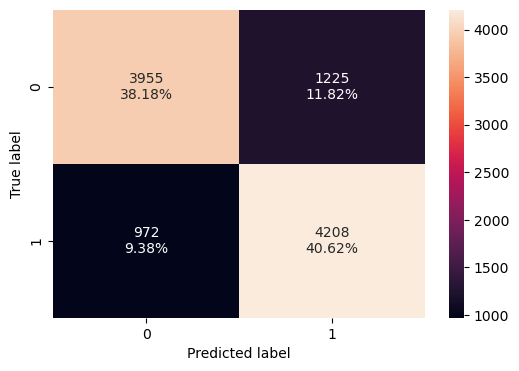

In [132]:
plot_confusion_matrix(m11_Logit_tuned_g, X_train_m11, y_train_m11)

In [133]:
# Checking Model Performance on Validation dataset
m11_Logit_tuned_g_perf_val = model_performance_classification_sklearn(m11_Logit_tuned_g, X_val_m11, y_val_m11)
m11_Logit_tuned_g_perf_val

Accuracy  Recall  Precision    F1
0     0.766   0.789      0.560 0.655

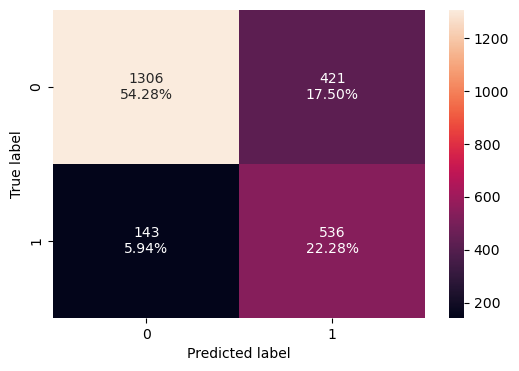

In [134]:
plot_confusion_matrix(m11_Logit_tuned_g, X_val_m11, y_val_m11)

#### Model 12 - AdaBoost - Tuned

In [140]:
# Make a copy of final datasets & label encode the target variable
le = LabelEncoder()
y_train_m12 = le.fit_transform(y_train_final)
y_val_m12 = le.transform(y_val_final)
y_test_m12 = le.transform(y_test_final)

X_train_m12 = X_train_final.copy()
X_val_m12 = X_val_final.copy()
X_test_m12 = X_test_final.copy()

In [196]:
%%time

#Build Tuned AdaBoost Model - RandomSearchCV

# Base weak learner
stump = DecisionTreeClassifier(
    max_depth=1,
    criterion='gini',
    random_state=42
)

ada = AdaBoostClassifier(
    estimator=stump,
    random_state=42
)

# Define broader distributions for randomized search
param_dist_ada = {
    'n_estimators': np.arange(50, 500, 50),  
    'learning_rate': np.arange(0.01, 0.5, 0.05),  
    'estimator__max_depth': np.arange(1, 4),     
    'estimator__criterion': ['gini', 'entropy']
}

random_search_ada = RandomizedSearchCV(
    estimator=ada,
    param_distributions=param_dist_ada,
    n_iter=30,                
    scoring='recall',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search_ada.fit(X_train_m12, y_train_m12)

print("Best Params (RandomSearchCV):", random_search_ada.best_params_)
print("Best CV Recall (RandomSearchCV):", random_search_ada.best_score_)

# Best tuned AdaBoost model from RandomSearchCV
m12_Ada_tuned_r = random_search_ada.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params (RandomSearchCV): {'n_estimators': 100, 'learning_rate': 0.41000000000000003, 'estimator__max_depth': 1, 'estimator__criterion': 'gini'}
Best CV Recall (RandomSearchCV): 0.8388030888030888
CPU times: total: 6.78 s
Wall time: 5min 54s


In [197]:
# Checking Model Performance on Training dataset
m12_Ada_tuned_r_perf_train = model_performance_classification_sklearn(m12_Ada_tuned_r, X_train_m12, y_train_m12)
m12_Ada_tuned_r_perf_train

Accuracy  Recall  Precision    F1
0     0.839   0.856      0.828 0.842

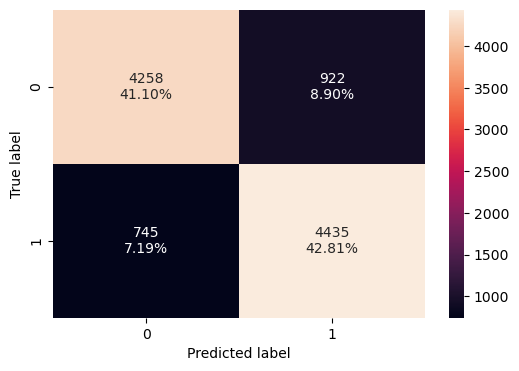

In [198]:
plot_confusion_matrix(m12_Ada_tuned_r, X_train_m12, y_train_m12)

In [199]:
# Checking Model Performance on Validation dataset
m12_Ada_tuned_r_perf_val = model_performance_classification_sklearn(m12_Ada_tuned_r, X_val_m12, y_val_m12)
m12_Ada_tuned_r_perf_val

Accuracy  Recall  Precision    F1
0     0.780   0.720      0.591 0.649

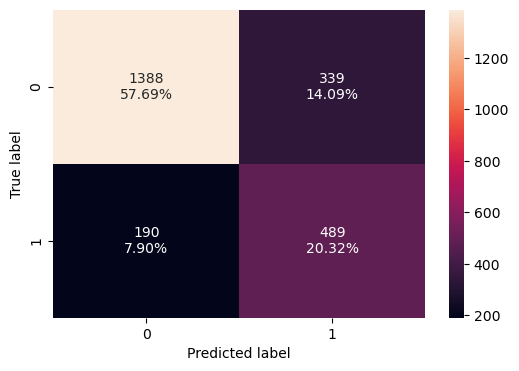

In [200]:
plot_confusion_matrix(m12_Ada_tuned_r, X_val_m12, y_val_m12)

#### Model 13 - Gradient Boosting - Tuned

In [151]:
# Make a copy of final datasets & label encode the target variable
le = LabelEncoder()
y_train_m13 = le.fit_transform(y_train_final)
y_val_m13 = le.transform(y_val_final)
y_test_m13 = le.transform(y_test_final)

X_train_m13 = X_train_final.copy()
X_val_m13 = X_val_final.copy()
X_test_m13 = X_test_final.copy()

In [157]:
%%time
#Build Tuned Gradient Boosting - RandomSearchCV

# Base model
gb_base = GradientBoostingClassifier(
    random_state=42
)

param_dist_gb = {
    'n_estimators': np.arange(100, 501, 50),       # 100 to 500 trees in steps of 50
    'learning_rate': np.arange(0.01, 0.21, 0.03),  # 0.01 to 0.2 in steps of 0.03
    'max_depth': np.arange(2, 6),                  # 2, 3, 4, 5
    'subsample': np.arange(0.6, 1.1, 0.1)          # 0.6 to 1.0 in steps of 0.1
}

gb_random = RandomizedSearchCV(
    estimator=gb_base,
    param_distributions=param_dist_gb,
    n_iter=30,               
    scoring='recall',         
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit on training data
gb_random.fit(X_train_m13, y_train_m13)

print("Best Params (Gradient Boosting, RandomizedSearchCV):", gb_random.best_params_)
print("Best CV Recall (Gradient Boosting, RandomizedSearchCV):", gb_random.best_score_)

# Best tuned Gradient Boosting model from RandomizedSearchCV
m13_GB_tuned_r = gb_random.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params (Gradient Boosting, RandomizedSearchCV): {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.04}
Best CV Recall (Gradient Boosting, RandomizedSearchCV): 0.8362934362934362
CPU times: total: 12 s
Wall time: 7min 39s


In [201]:
# Checking Model Performance on Training dataset
m13_GB_tuned_r_perf_train = model_performance_classification_sklearn(m13_GB_tuned_r, X_train_m13, y_train_m13)
m13_GB_tuned_r_perf_train

Accuracy  Recall  Precision    F1
0     0.858   0.867      0.851 0.859

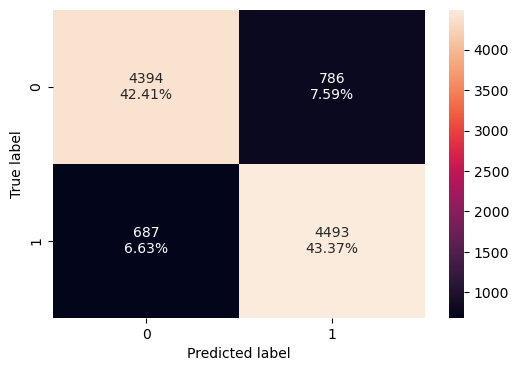

In [202]:
plot_confusion_matrix(m13_GB_tuned_r, X_train_m13, y_train_m13)

In [203]:
# Checking Model Performance on Validation dataset
m13_GB_tuned_r_perf_val = model_performance_classification_sklearn(m13_GB_tuned_r, X_val_m13, y_val_m13)
m13_GB_tuned_r_perf_val

Accuracy  Recall  Precision    F1
0     0.785   0.676      0.606 0.639

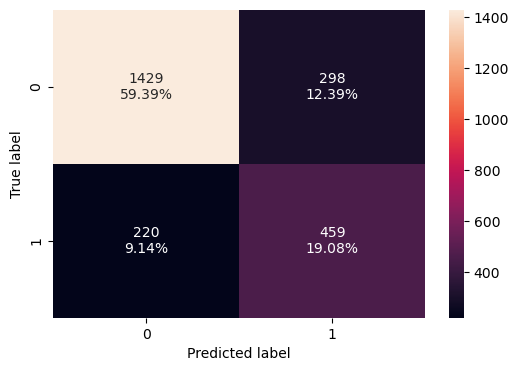

In [204]:
plot_confusion_matrix(m13_GB_tuned_r, X_val_m13, y_val_m13)

#### Model 14 - XGBoost - Tuned

In [162]:
# Make a copy of final datasets & label encode the target variable
le = LabelEncoder()
y_train_m14 = le.fit_transform(y_train_final)
y_val_m14 = le.transform(y_val_final)
y_test_m14 = le.transform(y_test_final)

X_train_m14 = X_train_final.copy()
X_val_m14 = X_val_final.copy()
X_test_m14 = X_test_final.copy()

In [195]:
%%time
#Build Tuned XGBoost - RandomSearchCV

xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

param_dist_xgb = {
    'n_estimators': np.arange(100, 501, 50),        
    'learning_rate': np.arange(0.01, 0.21, 0.03),   
    'max_depth': np.arange(3, 8),                  
    'subsample': np.arange(0.5, 1.01, 0.1),         
    'colsample_bytree': np.arange(0.5, 1.01, 0.1),  
    'min_child_weight': np.arange(1, 8, 2),         
    'reg_lambda': np.arange(0.0, 5.5, 0.5),         
    'reg_alpha': np.arange(0.0, 2.1, 0.3)           
}

xgb_random = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist_xgb,
    n_iter=40,               
    scoring='recall',        
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

xgb_random.fit(X_train_m14, y_train_m14)

print("Best Params (XGBoost, RandomizedSearchCV):", xgb_random.best_params_)
print("Best CV Recall (XGBoost, RandomizedSearchCV):", xgb_random.best_score_)

# Best model from RandomizedSearchCV
m14_XGB_tuned_r = xgb_random.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Params (XGBoost, RandomizedSearchCV): {'subsample': 0.6, 'reg_lambda': 2.5, 'reg_alpha': 1.2, 'n_estimators': 250, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Best CV Recall (XGBoost, RandomizedSearchCV): 0.8420849420849421
CPU times: total: 6.05 s
Wall time: 57.9 s


In [164]:
# Checking Model Performance on Training dataset
m14_XGB_tuned_r_perf_train = model_performance_classification_sklearn(m14_XGB_tuned_r, X_train_m14, y_train_m14)
m14_XGB_tuned_r_perf_train

Accuracy  Recall  Precision    F1
0     0.847   0.865      0.834 0.850

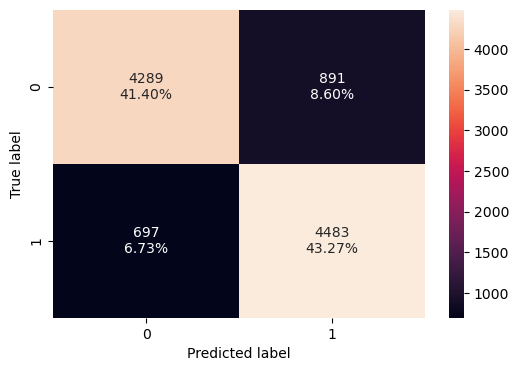

In [165]:
plot_confusion_matrix(m14_XGB_tuned_r, X_train_m14, y_train_m14)

In [166]:
# Checking Model Performance on Validation dataset
m14_XGB_tuned_r_perf_val = model_performance_classification_sklearn(m14_XGB_tuned_r, X_val_m14, y_val_m14)
m14_XGB_tuned_r_perf_val

Accuracy  Recall  Precision    F1
0     0.784   0.717      0.598 0.652

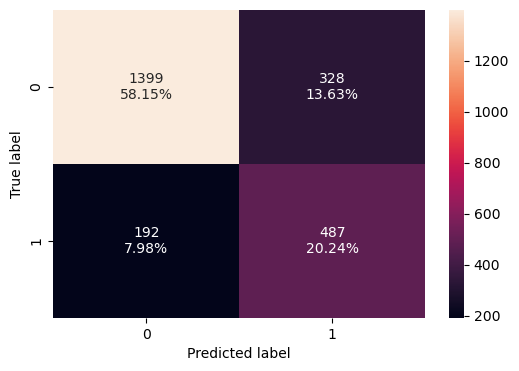

In [167]:
plot_confusion_matrix(m14_XGB_tuned_r, X_val_m14, y_val_m14)

#### Model 15 - Stacking Model

In [168]:
# Make a copy of final datasets & label encode the target variable
le = LabelEncoder()
y_train_m15 = le.fit_transform(y_train_final)
y_val_m15 = le.transform(y_val_final)
y_test_m15 = le.transform(y_test_final)

X_train_m15 = X_train_final.copy()
X_val_m15 = X_val_final.copy()
X_test_m15 = X_test_final.copy()

In [223]:
%%time

# Lets Build a Stacking Classifier with 3 strong performers
# Ridge Logistic Regression
# Model 9: Gradient Boosting
# Model 10: Adaboost
#The meta-model learns how to best combine the predictions of the base models - XGBoost

estimators = [
    ('ridge_logit', m11_Logit_tuned_g),            
    ('ada', m12_Ada_tuned_r),    
    ('gradboost', m13_GB_tuned_r)
]

final_xgb_meta = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    scale_pos_weight=3
)

m15_stack = StackingClassifier(
    estimators=estimators,
    final_estimator=final_xgb_meta,
    cv=5,                
    n_jobs=-1,
    stack_method='predict_proba',  # use predicted probabilities
)

# Fit the stacked model
m15_stack.fit(X_train_m15, y_train_m15)

CPU times: total: 1.58 s
Wall time: 27.1 s


StackingClassifier(cv=5,
                   estimators=[('ridge_logit',
                                LogisticRegression(C=1, penalty='l1',
                                                   random_state=42,
                                                   solver='liblinear')),
                               ('ada',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                                                    random_state=42),
                                                   learning_rate=0.41000000000000003,
                                                   n_estimators=100,
                                                   random_state=42)),
                               ('gradboost',
                                GradientBoostingClassifier(learning_rate=0.04,
                                                           max_depth=...
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=3, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=200, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=42, ...),
                   n_jobs=-1, stack_method='predict_proba')

In [170]:
# Checking Model Performance on Training dataset
m15_stack_perf_train = model_performance_classification_sklearn(m15_stack, X_train_m15, y_train_m15)
m15_stack_perf_train

Accuracy  Recall  Precision    F1
0     0.817   0.939      0.755 0.837

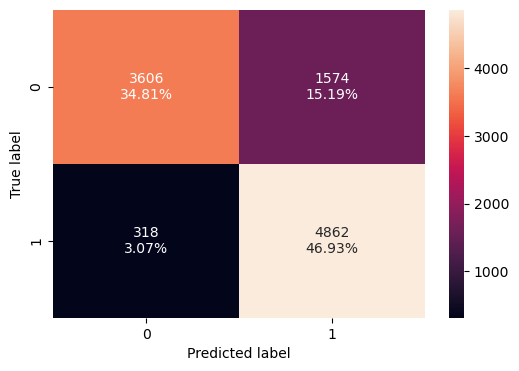

In [171]:
plot_confusion_matrix(m15_stack, X_train_m15, y_train_m15)

In [172]:
# Checking Model Performance on Validation dataset
m15_stack_perf_val = model_performance_classification_sklearn(m15_stack, X_val_m15, y_val_m15)
m15_stack_perf_val

Accuracy  Recall  Precision    F1
0     0.731   0.850      0.514 0.640

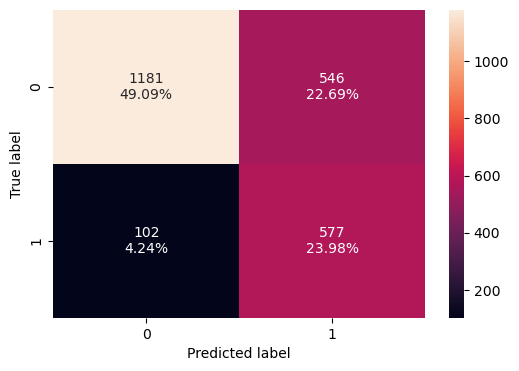

In [173]:
plot_confusion_matrix(m15_stack, X_val_m15, y_val_m15)

#### Model 16 - SVM

In [174]:
# Make a copy of final datasets & label encode the target variable
le = LabelEncoder()
y_train_m16 = le.fit_transform(y_train_final)
y_val_m16 = le.transform(y_val_final)
y_test_m16 = le.transform(y_test_final)

X_train_m16 = X_train_final.copy()
X_val_m16 = X_val_final.copy()
X_test_m16 = X_test_final.copy()

In [190]:
%%time
# Build SVM Model
# Initialize SVM classifier

# Base SVM model
svm_base = SVC(
    probability=False,                   # skip probability estimates → faster
    class_weight='balanced',             # handle imbalance natively
    cache_size=700,                      # allocate more memory to speed up kernel computation
    tol=1e-3,                            # slightly relaxed tolerance to converge faster
    max_iter=2000,                       # reasonable upper bound on iterations
    random_state=42
)

# Define parameter distribution for random search
param_dist_svm = {
    'C': np.logspace(-2, 1, 20),         # smaller, focused range (0.01 → 100)
    'gamma': np.logspace(-3, 0, 10),     # reasonable kernel width values
    'kernel': ['rbf'],                   # RBF only (most effective for churn)
}

# Randomized search setup
svm_random = RandomizedSearchCV(
    estimator=svm_base,
    param_distributions=param_dist_svm,
    n_iter=15,                           # limit to 15 smart random combinations
    scoring='recall',                    # optimize recall (catch churners)
    cv=5,                                # 5-fold CV
    n_jobs=-1,                           # use all cores
    verbose=1,
    random_state=42
)

svm_random.fit(X_train_m16, y_train_m16)

print("Best Params (SVM - RandomSearchCV):", svm_random.best_params_)
print("Best CV Recall (SVM - RandomSearchCV):", svm_random.best_score_)

m16_svm = svm_random.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Params (SVM - RandomSearchCV): {'kernel': 'rbf', 'gamma': 0.001, 'C': 4.832930238571752}
Best CV Recall (SVM - RandomSearchCV): 0.946911196911197
CPU times: total: 1.58 s
Wall time: 23.9 s


In [191]:
# Checking Model Performance on Training dataset
m16_svm_perf_train = model_performance_classification_sklearn(m16_svm, X_train_m16, y_train_m16)
m16_svm_perf_train

Accuracy  Recall  Precision    F1
0     0.480   0.901      0.489 0.634

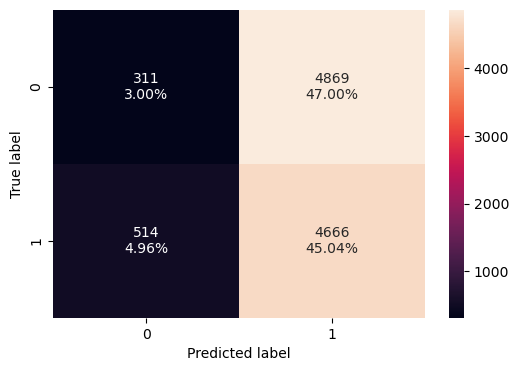

In [192]:
plot_confusion_matrix(m16_svm, X_train_m16, y_train_m16)

In [193]:
# Checking Model Performance on Validation dataset
m16_svm_perf_val = model_performance_classification_sklearn(m16_svm, X_val_m16, y_val_m16)
m16_svm_perf_val

Accuracy  Recall  Precision    F1
0     0.306   0.915      0.278 0.427

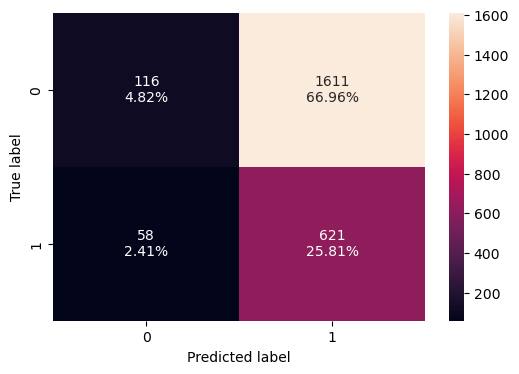

In [194]:
plot_confusion_matrix(m16_svm, X_val_m16, y_val_m16)

#### Model 17 - ANN

In [176]:
# Make a copy of final datasets & label encode the target variable
le = LabelEncoder()
y_train_m17 = le.fit_transform(y_train_final)
y_val_m17 = le.transform(y_val_final)
y_test_m17 = le.transform(y_test_final)

X_train_m17 = X_train_final.copy()
X_val_m17 = X_val_final.copy()
X_test_m17 = X_test_final.copy()

In [177]:
# Build ANN Model
tf.keras.backend.clear_session()
m17_ann = Sequential([
    Dense(128, activation='relu', input_dim=X_train_m17.shape[1]),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # output: churn probability
])

m17_ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,537 (68.50 KB)

 Trainable params: 17,089 (66.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [178]:
optimizer = Adam(learning_rate=0.0008)

m17_ann.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.Precision(name='precision')
    ]
)


# We stop when validation recall stops improving, because Recall is the primary KPI for churn.
early_stop = EarlyStopping(
    monitor='val_recall',
    mode='max',          # we want to maximize recall
    patience=10,
    restore_best_weights=True,
    verbose=1
)

history = m17_ann.fit(
    X_train_m17, y_train_m17,
    validation_data=(X_val_m17, y_val_m17),
    epochs=200,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6118 - loss: 0.7505 - precision: 0.6117 - recall: 0.6015 - val_accuracy: 0.7041 - val_loss: 0.5836 - val_precision: 0.4857 - val_recall: 0.8262
Epoch 2/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7315 - loss: 0.5813 - precision: 0.7188 - recall: 0.7583 - val_accuracy: 0.7190 - val_loss: 0.5442 - val_precision: 0.5014 - val_recall: 0.8174
Epoch 3/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7474 - loss: 0.5277 - precision: 0.7278 - recall: 0.7832 - val_accuracy: 0.7261 - val_loss: 0.5336 - val_precision: 0.5091 - val_recall: 0.8203
Epoch 4/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7618 - loss: 0.5068 - precision: 0.7526 - recall: 0.7836 - val_accuracy: 0.7203 - val_loss: 0.5389 - val_precision: 0.5027 - val_recall: 0.8306
Epoch 5/200
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7743 - loss: 0.4983 - precision: 0.7634 - recall: 0.7996 - val_accuracy: 0.7211 - val_lo

In [179]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

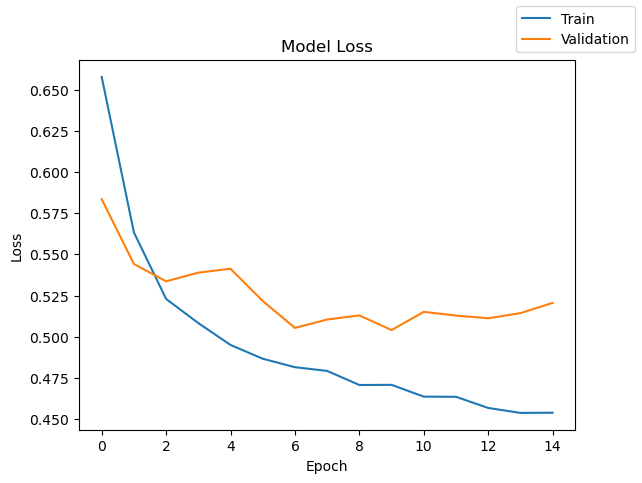

In [180]:
plot(history,'loss')

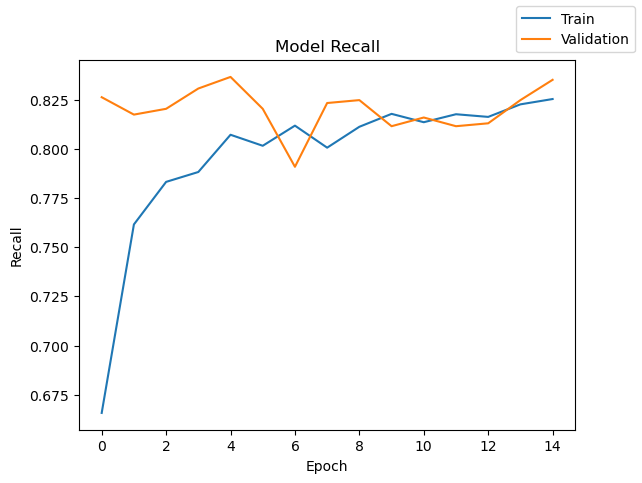

In [181]:
plot(history,'recall')

In [211]:
# Show Training Performance Metrics

# Get predicted probabilities from ANN
y_train_pred_prob_m17 = m17_ann.predict(X_train_m17)
y_val_pred_prob_m17   = m17_ann.predict(X_val_m17)
y_test_pred_prob_m17   = m17_ann.predict(X_test_m17)

# Convert probabilities to binary predictions using best threshold
y_train_pred_m17 = (y_train_pred_prob_m17 >= 0.5).astype(int)
y_val_pred_m17   = (y_val_pred_prob_m17 >= 0.5).astype(int)
y_test_pred_m17   = (y_test_pred_prob_m17 >= 0.5).astype(int)

m17_ann_perf_train = pd.DataFrame({
    'Accuracy':  [accuracy_score(y_train_m17, y_train_pred_m17)],
    'Recall':    [recall_score(y_train_m17, y_train_pred_m17)],
    'Precision': [precision_score(y_train_m17, y_train_pred_m17)],
    'F1':        [f1_score(y_train_m17, y_train_pred_m17)]
})
m17_ann_perf_train

324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy  Recall  Precision    F1
0     0.779   0.864      0.738 0.796

In [212]:
# Show Validation Performance Metrics
m17_ann_perf_val = pd.DataFrame({
    'Accuracy':  [accuracy_score(y_val_m17, y_val_pred_m17)],
    'Recall':    [recall_score(y_val_m17, y_val_pred_m17)],
    'Precision': [precision_score(y_val_m17, y_val_pred_m17)],
    'F1':        [f1_score(y_val_m17, y_val_pred_m17)]
})
m17_ann_perf_val

Accuracy  Recall  Precision    F1
0     0.721   0.837      0.504 0.629

Text(0.5, 14.722222222222216, 'Predicted label')

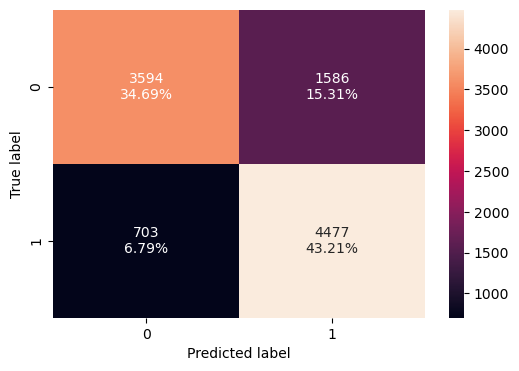

In [184]:
# Confusion Matrix for Training Dataset

cm_ann_t = confusion_matrix(y_train_m17, y_train_pred_m17)
labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm_ann_t.flatten().sum())]
            for item in cm_ann_t.flatten()
        ]
).reshape(2, 2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_ann_t, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")

Text(0.5, 14.722222222222216, 'Predicted label')

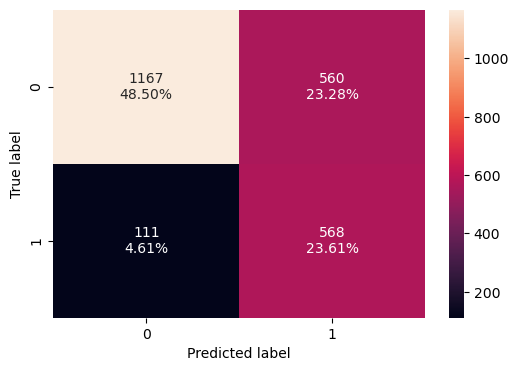

In [185]:
# Confusion Matrix for Validation Dataset

cm_ann_v = confusion_matrix(y_val_m17, y_val_pred_m17)
labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm_ann_v.flatten().sum())]
            for item in cm_ann_v.flatten()
        ]
).reshape(2, 2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_ann_v, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")

### Model Performance Comparison and Final Model Selection

In [207]:
model_comparison_df_tuned = []
# Dictionary to map model index
model_names_tuned = {
    1: "Logistic Regression - Tuned",
    2: "AdaBoost - Tuned",
    3: "Gradient Boosting - Tuned",
    4: "XGBoost - Tuned",
    5: "Stacking Model",
    6: "SVM",
    7: "ANN"
}

# Dictionary to map model index
model_perf_dfs_tuned = {
    1: (m11_Logit_tuned_g_perf_train,  m11_Logit_tuned_g_perf_val),
    2: (m12_Ada_tuned_r_perf_train,  m12_Ada_tuned_r_perf_val),
    3: (m13_GB_tuned_r_perf_train,  m13_GB_tuned_r_perf_val),
    4: (m14_XGB_tuned_r_perf_train,  m14_XGB_tuned_r_perf_val),
    5: (m15_stack_perf_train,  m15_stack_perf_val),
    6: (m16_svm_perf_train,  m16_svm_perf_val),
    7: (m17_ann_perf_train,  m17_ann_perf_val)
}

# Build rows for the final summary table
rows = []

for model_id, (train_df, val_df) in model_perf_dfs_tuned.items():
    train_recall = train_df["Recall"].iloc[0]
    val_recall = val_df["Recall"].iloc[0]
    rows.append({
        "Model No.": model_id,
        "Model Name": model_names_tuned[model_id],
        "Training Recall":  train_df["Recall"].iloc[0],
        "Validation Recall": val_df["Recall"].iloc[0],
        "Recall Gap (Train-Val)": round(train_recall - val_recall, 4),
        "Training F1":      train_df["F1"].iloc[0],
        "Validation F1":    val_df["F1"].iloc[0]
    })

# Create final comparison table
model_comparison_df_tuned = pd.DataFrame(rows)

# Sort by Validation Recall (descending) to see best churn-catchers first
model_comparison_df_tuned = model_comparison_df_tuned.sort_values(
    by="Validation Recall", ascending=False
).reset_index(drop=True)

model_comparison_df_tuned

Model No.                   Model Name  Training Recall  Validation Recall  \
0          6                          SVM            0.901              0.915   
1          5               Stacking Model            0.939              0.850   
2          7                          ANN            0.864              0.837   
3          1  Logistic Regression - Tuned            0.812              0.789   
4          2             AdaBoost - Tuned            0.856              0.720   
5          4              XGBoost - Tuned            0.865              0.717   
6          3    Gradient Boosting - Tuned            0.867              0.676   

   Recall Gap (Train-Val)  Training F1  Validation F1  
0                  -0.014        0.634          0.427  
1                   0.089        0.837          0.640  
2                   0.028        0.796          0.629  
3                   0.023        0.793          0.655  
4                   0.136        0.842          0.649  
5                   0.148        0.850          0.652  
6                   0.191        0.859          0.639

#### Test Performances of Top 3 Models - SVM, Stacking Model & ANN

##### Test Performance - SVM

In [209]:
# Checking SVM Model Performance on Training dataset
m16_svm_perf_test = model_performance_classification_sklearn(m16_svm, X_test_m16, y_test_m16)
m16_svm_perf_test

Accuracy  Recall  Precision    F1
0     0.300   0.907      0.275 0.422

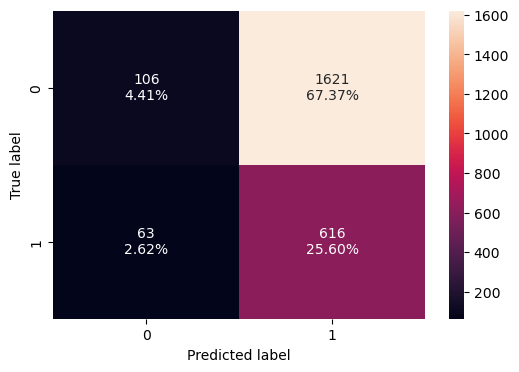

In [210]:
plot_confusion_matrix(m16_svm, X_test_m16, y_test_m16)

##### Test Performance - Stacking Model

In [216]:
# Checking Stack Model Performance on Training dataset
m15_stack_perf_test = model_performance_classification_sklearn(m15_stack, X_test_m15, y_test_m15)
m15_stack_perf_test

Accuracy  Recall  Precision    F1
0     0.741   0.848      0.526 0.649

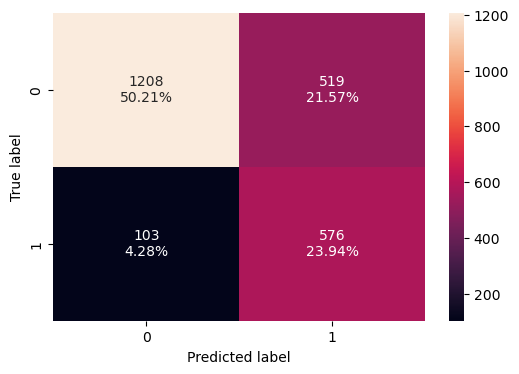

In [217]:
plot_confusion_matrix(m15_stack, X_test_m15, y_test_m15)

##### Test Performance - ANN

In [213]:
m17_ann_perf_test = pd.DataFrame({
    'Accuracy':  [accuracy_score(y_test_m17, y_test_pred_m17)],
    'Recall':    [recall_score(y_test_m17, y_test_pred_m17)],
    'Precision': [precision_score(y_test_m17, y_test_pred_m17)],
    'F1':        [f1_score(y_test_m17, y_test_pred_m17)]
})
m17_ann_perf_test

Accuracy  Recall  Precision    F1
0     0.738   0.837      0.522 0.643

Text(0.5, 14.722222222222216, 'Predicted label')

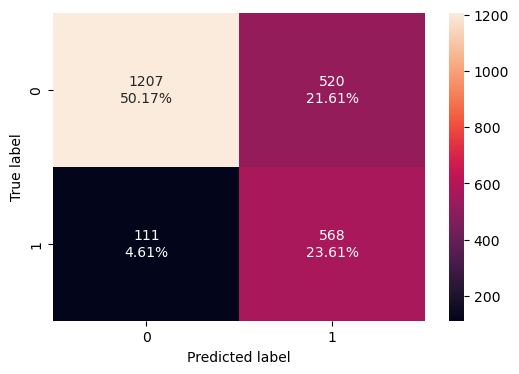

In [214]:
# Confusion Matrix for Test Dataset

cm_ann_t = confusion_matrix(y_test_m17, y_test_pred_m17)
labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm_ann_t.flatten().sum())]
            for item in cm_ann_t.flatten()
        ]
).reshape(2, 2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_ann_t, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")

##### Final Model Selection Based on Test Performance

In [218]:
model_comparison_df_final = []
# Dictionary to map model index
model_names_final = {
    1: "SVM",
    2: "Stacking Model",
    3: "ANN"
}

# Dictionary to map model index
model_perf_dfs_final = {
    1: (m16_svm_perf_train,  m16_svm_perf_test),
    2: (m15_stack_perf_train,  m15_stack_perf_test),
    3: (m17_ann_perf_train,  m17_ann_perf_test)
}

# Build rows for the final summary table
rows = []

for model_id, (train_df, test_df) in model_perf_dfs_final.items():
    train_recall = train_df["Recall"].iloc[0]
    test_recall = test_df["Recall"].iloc[0]
    rows.append({
        "Model No.": model_id,
        "Model Name": model_names_final[model_id],
        "Training Recall":  train_df["Recall"].iloc[0],
        "Test Recall": test_df["Recall"].iloc[0],
        "Recall Gap (Train-Test)": round(train_recall - test_recall, 4),
        "Training F1":      train_df["F1"].iloc[0],
        "Test F1":    test_df["F1"].iloc[0]
    })

# Create final comparison table
model_comparison_df_final = pd.DataFrame(rows)

# Sort by Validation Recall (descending) to see best churn-catchers first
model_comparison_df_final = model_comparison_df_final.sort_values(
    by="Test Recall", ascending=False
).reset_index(drop=True)

model_comparison_df_final

Model No.      Model Name  Training Recall  Test Recall  \
0          1             SVM            0.901        0.907   
1          2  Stacking Model            0.939        0.848   
2          3             ANN            0.864        0.837   

   Recall Gap (Train-Test)  Training F1  Test F1  
0                   -0.006        0.634    0.422  
1                    0.090        0.837    0.649  
2                    0.028        0.796    0.643

## Actionable Insights & Recommendations

Deployment Recommendation:-

* Deploy two complementary models — Stacking Model and Artificial Neural Network (ANN) — to balance recall coverage, interpretability, and generalization.

* This approach maximizes churn capture while maintaining operational efficiency and scalability across customer segments.


* Please refer Business Report for more details